## Capston Final Project -SG

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('seaborn')

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# matplotlib for plotting
import matplotlib.cm as cm
import matplotlib.colors as colors

# generating maps
!conda install -c conda-forge folium=0.5.0
import folium 

# k-means for Clustering
from sklearn.cluster import KMeans

#for gettinglatitude and longitude values from address

from geopy.geocoders import Nominatim 

import json # library to handle JSON files


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

#### Credentials for accessing the file on IBM Cloud Object Storage

In [2]:
# The code was removed by Watson Studio for sharing.

#### Retrieving a file from Cloud Object Storage

In [3]:
# The code was removed by Watson Studio for sharing.

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,4844809,2018-05-22
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,0,2018-05-23
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,1,0,1,1883,5200,1900,1,A4,6100000,2018-12-03
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,,B1,113 AVENUE C,,...,2,0,2,1218,4764,1899,1,B1,0,2018-04-25
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,,B9,166 AVENUE A,,...,2,0,2,1510,4520,1900,1,B9,0,2018-11-29


#### Data Cleansing 

In [4]:
# Data types of the columns , shape of the dataset
print(df_data.shape,'/n')

print(df_data.dtypes,'/n')

(79626, 21) /n
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE 

#### Remove Duplicates

In [5]:
#df_data["is_duplicate"]=df_data.duplicated()
#df_data.loc[df_data["is_duplicate"].astype(str)=='True']
#del df_data["is_duplicate"]

#checking for duplicate records
sum(df_data.duplicated(df_data.columns))


570

In [6]:
# remove duplicate records 
df_data = df_data.drop_duplicates(df_data.columns, keep='last')

In [7]:
#check for duplicate records 

sum(df_data.duplicated(df_data.columns))


0

In [8]:
df_data.shape

(79056, 21)

 Borough is represented in terms of value 1 (Manhattan),2(Bronx),3(Brooklyn),4(Queens),5(Staten Island)
 Converting the numerical values for Borough Column to their Corresponding names


In [9]:
df_data['BOROUGH'].loc[df_data['BOROUGH'] == 1] = 'Manhattan'
df_data['BOROUGH'].loc[df_data['BOROUGH'] == 2] = 'Bronx'
df_data['BOROUGH'].loc[df_data['BOROUGH'] == 3] = 'Brooklyn'
df_data['BOROUGH'].loc[df_data['BOROUGH'] == 4] = 'Queens'
df_data['BOROUGH'].loc[df_data['BOROUGH'] == 5] ='Staten Island'

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
df_data['BOROUGH'].value_counts()

Queens           25110
Brooklyn         22416
Manhattan        16242
Staten Island     7935
Bronx             7353
Name: BOROUGH, dtype: int64

Checking for Nan values 

In [11]:
df_data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

No null values found

In [12]:
df_data['SALE PRICE'].value_counts().head(5)


0         23052
10          663
650000      427
550000      400
800000      390
Name: SALE PRICE, dtype: int64

As we can see there are some entries where salesprice is equal to 10 / 0
getting rid of invalid entries

In [13]:
#Rename the sale date , sale price columns
df_data.rename(columns={'SALE PRICE':'SALEPRICE'}, inplace=True)
df_data.rename(columns={'SALE DATE':'SALEDATE'}, inplace=True)

#Getting rid of invalid records
#df.drop(df.index[df['line_race'] == 0], inplace = True)df_data=df_data

df_data.drop(df_data.index[df_data['SALEPRICE'] == 0], inplace = True)
df_data.drop(df_data.index[df_data['SALEPRICE'] == 10], inplace =True)           

Let’s visualize the data further


In [14]:
df_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,55341.000000,55341.000000,55341.000000,55341.000000,55341.000000,55341.000000,5.534100e+04,5.534100e+04,55341.000000,55341.000000,5.534100e+04
mean,4323.239009,371.682080,10784.509279,1.607795,0.145606,1.861296,5.576589e+03,2.185959e+03,1827.935238,1.608753,1.664326e+06
std,3654.750079,674.780633,907.608816,10.835122,2.107839,11.399169,2.589368e+04,1.702477e+04,474.810874,0.700879,1.590659e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00
25%,1331.000000,21.000000,10304.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1920.000000,1.000000,4.150000e+05
50%,3325.000000,49.000000,11207.000000,1.000000,0.000000,1.000000,1.958000e+03,1.148000e+03,1940.000000,2.000000,6.650000e+05
75%,6417.000000,475.000000,11358.000000,2.000000,0.000000,2.000000,3.200000e+03,1.928000e+03,1966.000000,2.000000,1.100000e+06
max,16350.000000,9025.000000,11697.000000,1327.000000,180.000000,1348.000000,1.150244e+06,1.741458e+06,2018.000000,4.000000,2.397502e+09


The heat map produced below will descirbe Pearson Correlation between two variable or features
Pearson relation measure the dependency between two variables / Features
method corr() produces pearson values 
:value 1 -- strong interdependency between features
:value 0 -- no dependency
:value -1 -- neagtive correlation

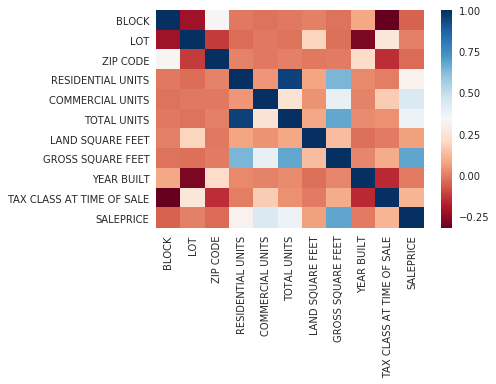

In [15]:
corr = df_data.corr()
#sns.heatmap(corr)  
sns.heatmap(corr, cmap="RdBu")


### PRICE VS BOROUGH

#### Calculating Average Sale Price per Borough

In [16]:

pivot_data=pd.pivot_table(df_data,index=["BOROUGH"],values=["SALEPRICE"],aggfunc=np.mean) 

pd.options.display.float_format = '{:.3f}'.format # Converting exponential numbers(378.3458+e) (applicable only to floats)
pivot_data.sort_values(by ='SALEPRICE',ascending=False)


#pivot=df_data.pivot_table(index='BOROUGH', values='SALEPRICE', aggfunc=np.mean)
#pd.options.display.float_format = '{:.3f}'.format
#pivot.sort_values(by='SALEPRICE',ascending=False)


,SALEPRICE
BOROUGH,
Manhattan,3992252.023
Brooklyn,1389220.312
Queens,829326.043
Bronx,825982.163
Staten Island,577052.335


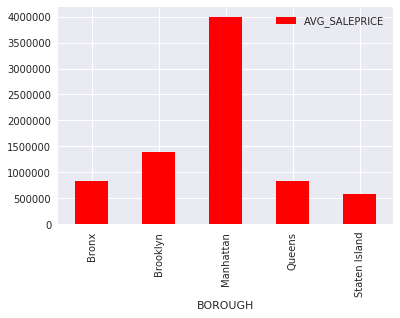

In [17]:
pivot_data.rename(columns={'SALEPRICE':'AVG_SALEPRICE'}, inplace=True)
pivot_data.plot(kind='bar', color='red')


from the bar plot  the maximum average sales price belongs to BOROUGH=Manhattan

In [18]:
# BUILDING CLASS CATEGORY
print(df_data['BUILDING CLASS CATEGORY'].nunique())

pivot=df_data.pivot_table(index='BUILDING CLASS CATEGORY', values='SALEPRICE', aggfunc=np.median)

pd.options.display.float_format = '{:.3f}'.format # Converting exponential numbers(378.3458+e) (applicable only to floats)
pivot.rename(columns={'SALEPRICE':'AVG_SALEPRICE'}, inplace=True)
pivot.sort_values(by='AVG_SALEPRICE',ascending=False)

44


,AVG_SALEPRICE
BUILDING CLASS CATEGORY,
25 LUXURY HOTELS,173926237.000
11A CONDO-RENTALS,115175000.000
34 THEATRES,48490000.000
26 OTHER HOTELS,20500000.000
23 LOFT BUILDINGS,17705951.000
08 RENTALS - ELEVATOR APARTMENTS,12900000.000
32 HOSPITAL AND HEALTH FACILITIES,5300486.500
39 TRANSPORTATION FACILITIES,5000000.000
21 OFFICE BUILDINGS,3700000.000


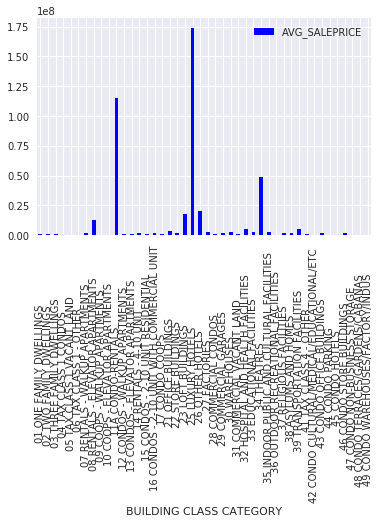

In [19]:
pivot.plot(kind='bar', color='blue')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


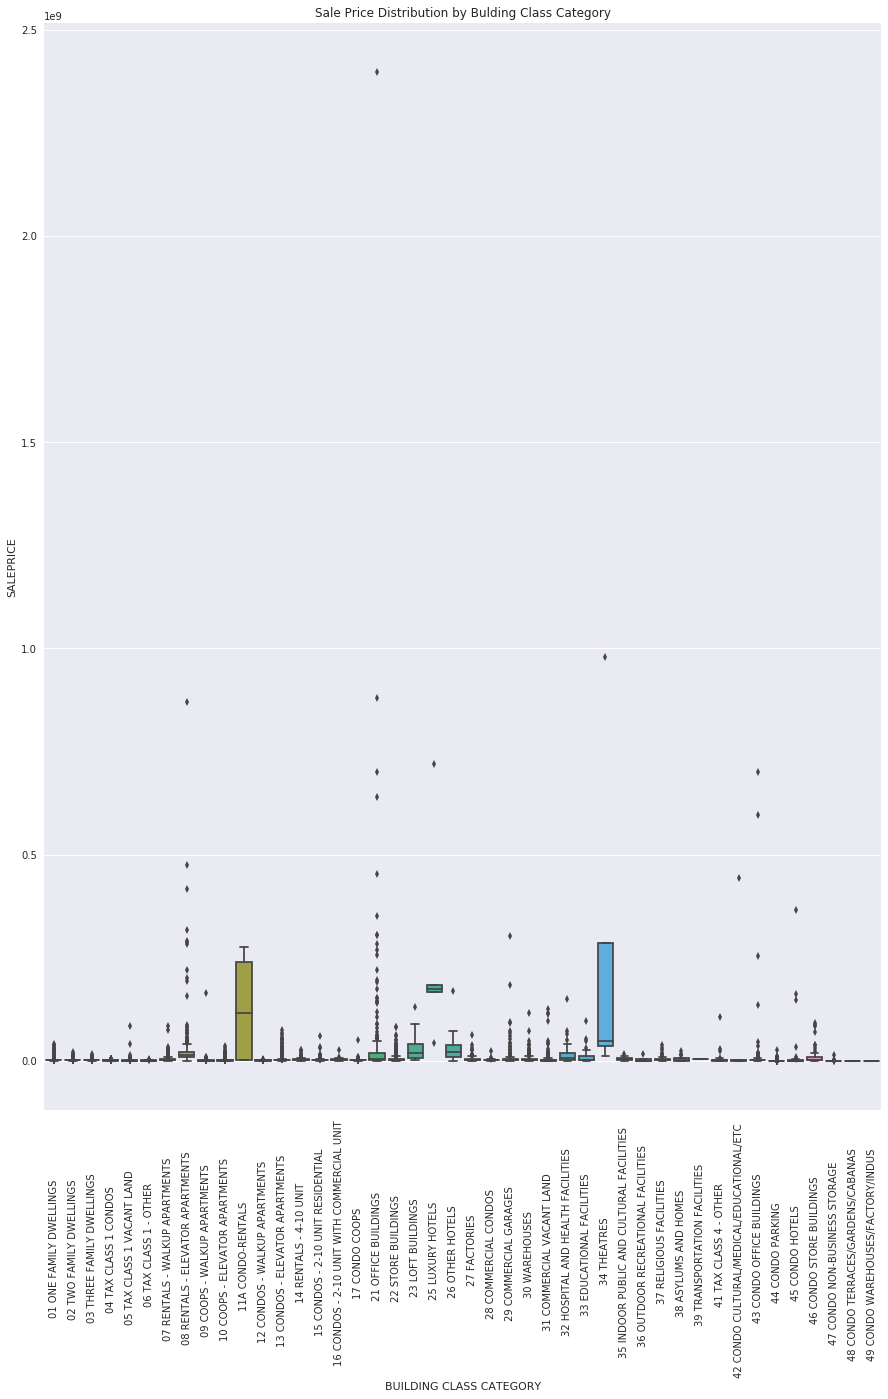

In [20]:
plt.figure(figsize=(15,20))
order = sorted(df_data['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALEPRICE', data=df_data, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

Observation : From the above plot we can state that
*25 LUXURY HOTELS* ,
*11A CONDO-RENTALS* ,
*34 THEATRES* ,
are highly Priced Buliding Class Categories

In [21]:
data1=df_data['BUILDING CLASS CATEGORY'].value_counts()
data1.head(10)

01 ONE FAMILY DWELLINGS                        12690
10 COOPS - ELEVATOR APARTMENTS                 10792
02 TWO FAMILY DWELLINGS                         9660
13 CONDOS - ELEVATOR APARTMENTS                 8734
09 COOPS - WALKUP APARTMENTS                    2358
03 THREE FAMILY DWELLINGS                       2350
07 RENTALS - WALKUP APARTMENTS                  1616
04 TAX CLASS 1 CONDOS                           1161
15 CONDOS - 2-10 UNIT RESIDENTIAL               1020
17 CONDO COOPS                                   949
Name: BUILDING CLASS CATEGORY, dtype: int64

#### From the data we can see that large number of properties belong to 01 ONE FAMILY DWELLINGS &10 COOPS  ELEVATOR APARTMENTS

Deleting data where Total Units==0

In [22]:
 # properties with 0 total units are deleted
df_data=df_data[(df_data['TOTAL UNITS']>0)]

deleting data where Total units is not equal to sum OF COMMERCIAL UNITS' and 'RESIDENTIAL UNITS' 

In [23]:
df_data[df_data['TOTAL UNITS'] != df_data['COMMERCIAL UNITS'] + df_data['RESIDENTIAL UNITS']].shape

(161, 21)

In [24]:
df_data=df_data[df_data['TOTAL UNITS'] == df_data['COMMERCIAL UNITS'] + df_data['RESIDENTIAL UNITS']]

df_data.shape

(40082, 21)

#### Residential Properties Per Borough

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Number of Residential Properties per Borough')

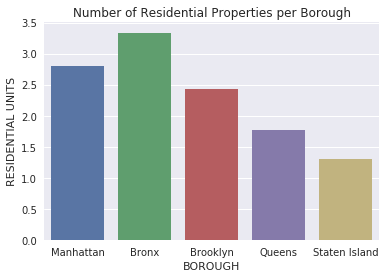

In [25]:
sns.barplot(y='RESIDENTIAL UNITS', x='BOROUGH',data=df_data, palette='deep', ci=None)
plt.title('Number of Residential Properties per Borough')

#### From the Plot we cans see that Bronx has more number of Residential units

#### Commerial Properties Per Borough

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Number of Commercial units Properties per Borough')

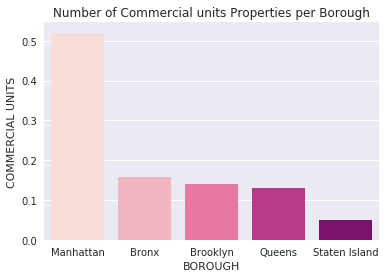

In [26]:
sns.barplot(y='COMMERCIAL UNITS', x='BOROUGH',data=df_data, palette='RdPu', ci=None)
plt.title('Number of Commercial units Properties per Borough')

#### From the plot The moat number of commercial units are in Manhattan

In [27]:
df_data.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALEDATE
0,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,4844809,2018-05-22
2,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,1,0,1,1883,5200,1900,1,A4,6100000,2018-12-03
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,,C7,133 AVENUE D,,...,20,2,22,3481,14588,1930,2,C7,8300000,2018-12-10
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,12,4,16,4186,10588,1900,2,C7,10350000,2018-09-07
8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,18,0,18,2271,10650,1910,2,C1,5000000,2018-09-05
9,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,,C3,203 EAST 7TH STREET,,...,4,0,4,1950,5446,2001,2,C3,6250000,2018-05-09
10,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,390,64,,C4,187 EAST 7TH STREET,,...,8,2,10,1642,5220,1910,2,C4,2400000,2018-05-18
14,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,393,23,,C7,632 EAST 11TH STREET,,...,33,2,35,4740,19980,1900,2,C7,17250000,2018-12-05
15,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,393,47,,C4,377 EAST 10TH,,...,12,0,12,2370,10715,1900,2,C4,954623,2018-06-04
20,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,33,,C7,28 AVENUE B,,...,16,1,17,1933,8699,1900,2,C7,5000000,2018-03-05


#### Number of properties sold in 2017-2018

In [28]:
#Extracting Year and Month from SALEDATE


#ym = ['year', 'month']
#df_data=df_data.join(pd.concat((getattr(df_data['SALEDATE'].dt, i).rename(i) for i in ym), axis=1))

df_data['YEARSOLD']= pd.DatetimeIndex(df_data['SALEDATE']).year 
df_data['MONTHOFSALE']= pd.DatetimeIndex(df_data['SALEDATE']).month


#### Borough with Highest SalePrice for sale year -2018

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'SalePrice per Borough - year 2018')

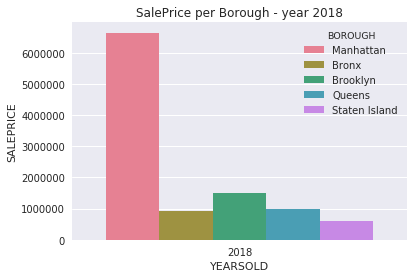

In [29]:
sns.barplot(x='YEARSOLD', y='SALEPRICE', hue='BOROUGH', data=df_data, palette='husl', ci=None)
plt.title('SalePrice per Borough - year 2018')

#### Monthly Sales Per Borough from Jan - Dec 2018

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Monthly Sales per Borough from JAN - DEC 2018')

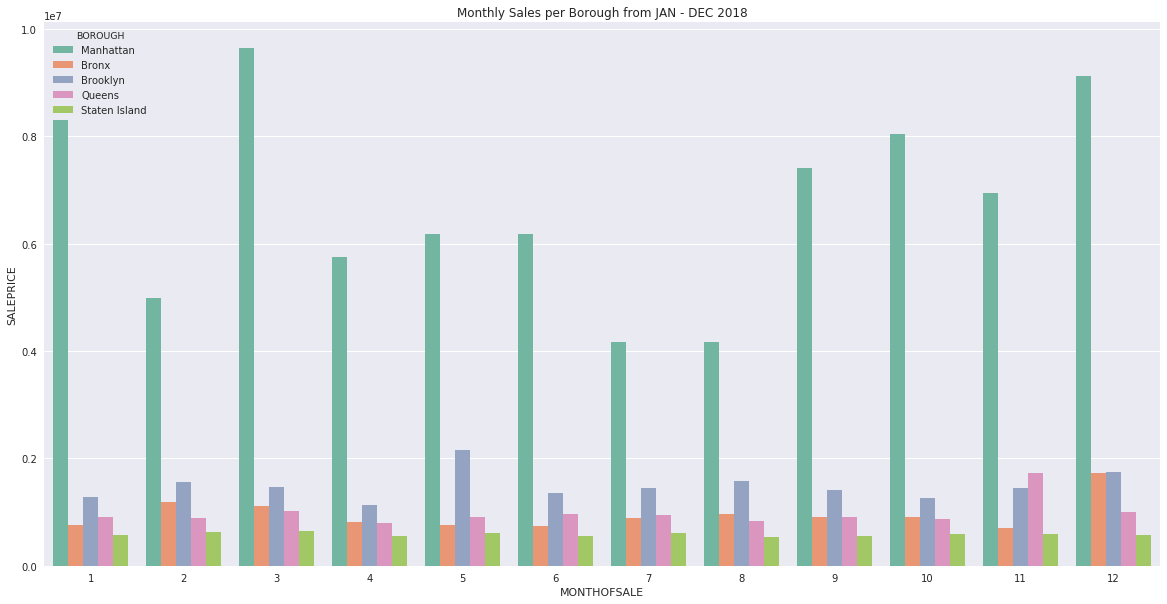

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='MONTHOFSALE', y='SALEPRICE', hue='BOROUGH', data=df_data, palette='Set2',ci=None)
plt.title('Monthly Sales per Borough from JAN - DEC 2018')

1. From the plots above we can say that Borough Manhattan has highest priced properties.
2. In year 2018 Mahattan has sold highest valued Property
3. Borough Manhattan experienced high Property salePrices in Jan and Dec months of year -2018

In [31]:
df_data['TAX CLASS AT PRESENT'].value_counts()
#df.head(10)

1     24508
2      9821
4      1969
2A     1149
1A     1057
2C     1051
2B      378
1C       90
         38
1B       21
Name: TAX CLASS AT PRESENT, dtype: int64

### Obtaining Longitude and Latitude information using geopy

In [32]:
print('The dataframe has {} boroughs and {} neighborhoods. {} shape'.format(
        len(df_data['BOROUGH'].unique()),
        len(df_data['NEIGHBORHOOD'].unique()),   
        df_data.shape[0]
    )
)

The dataframe has 5 boroughs and 249 neighborhoods. 40082 shape


#### Add new Address coloumn with neighborhood,city=NY

### Extracting Neighborhood , Borough information and calculating Longitude and latitude 

In [33]:
l1=df_data.groupby(['BOROUGH'])

df3=l1.apply(lambda x: x['NEIGHBORHOOD'].unique()) 

df3

BOROUGH
Bronx            [BATHGATE, BAYCHESTER, BEDFORD PARK/NORWOOD, B...
Brooklyn         [BATH BEACH, BAY RIDGE, BEDFORD STUYVESANT, BE...
Manhattan        [ALPHABET CITY, CHELSEA, CHINATOWN, CIVIC CENT...
Queens           [AIRPORT LA GUARDIA, ARVERNE, ASTORIA, BAYSIDE...
Staten Island    [ANNADALE, ARDEN HEIGHTS, ARROCHAR, ARROCHAR-S...
dtype: object

converting list into dataframe

In [34]:
df4=pd.DataFrame(df3) 
df4 

,0
BOROUGH,
Bronx,"[BATHGATE, BAYCHESTER, BEDFORD PARK/NORWOOD, B..."
Brooklyn,"[BATH BEACH, BAY RIDGE, BEDFORD STUYVESANT, BE..."
Manhattan,"[ALPHABET CITY, CHELSEA, CHINATOWN, CIVIC CENT..."
Queens,"[AIRPORT LA GUARDIA, ARVERNE, ASTORIA, BAYSIDE..."
Staten Island,"[ANNADALE, ARDEN HEIGHTS, ARROCHAR, ARROCHAR-S..."


Splitting the neighborhood data 

In [35]:
s = df4.apply(lambda x: pd.Series(x[0]), axis=1).stack().reset_index(level=1, drop=True)
s.name = 0
dfnew = df4.drop(0, axis=1).join(s)
dfnew[0] = pd.Series(dfnew[0], dtype=object)

dfnew.rename(columns={0: 'NEIGHBORHOOD'},inplace=True)
dfnew.reset_index(inplace=True)


In [36]:
dfnew

,BOROUGH,NEIGHBORHOOD
0,Bronx,BATHGATE
1,Bronx,BAYCHESTER
2,Bronx,BEDFORD PARK/NORWOOD
3,Bronx,BELMONT
4,Bronx,BRONX PARK
5,Bronx,BRONXDALE
6,Bronx,CASTLE HILL/UNIONPORT
7,Bronx,CITY ISLAND
8,Bronx,CO-OP CITY
9,Bronx,COUNTRY CLUB


Generating longitude and latitude

In [37]:
import geopy
from geopy.geocoders import Nominatim

nom=Nominatim()
#n=nom.geopycode

dfnew['Address']=dfnew['NEIGHBORHOOD'] + ','+'NY'

In [38]:
dfnew['coordinates']=dfnew["Address"].apply(nom.geocode)  # sending string to gecode method

In [39]:
dfnew['Latitude']=dfnew['coordinates'].apply(lambda x: x.latitude if x!= None else None) # latitude

In [40]:
dfnew['Longitude']=dfnew['coordinates'].apply(lambda x: x.longitude if x!= None else None)# longitude

In [41]:
dfnew

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude
0,Bronx,BATHGATE,"BATHGATE,NY","(Bath, Steuben County, New York, 14810, USA, (...",42.337,-77.318
1,Bronx,BAYCHESTER,"BAYCHESTER,NY","(Baychester, The Bronx, Bronx County, NYC, New...",40.861,-73.841
2,Bronx,BEDFORD PARK/NORWOOD,"BEDFORD PARK/NORWOOD,NY",None,nan,nan
3,Bronx,BELMONT,"BELMONT,NY","(Belmont, Allegany County, New York, USA, (42....",42.223,-78.034
4,Bronx,BRONX PARK,"BRONX PARK,NY","(Bronx Park, Belmont, The Bronx, Bronx County,...",40.859,-73.876
5,Bronx,BRONXDALE,"BRONXDALE,NY","(Bronxdale, The Bronx, Bronx County, NYC, New ...",40.851,-73.867
6,Bronx,CASTLE HILL/UNIONPORT,"CASTLE HILL/UNIONPORT,NY","(Unionport, The Bronx, Bronx County, NYC, New ...",40.827,-73.850
7,Bronx,CITY ISLAND,"CITY ISLAND,NY","(City Island, The Bronx, Bronx County, NYC, Ne...",40.847,-73.786
8,Bronx,CO-OP CITY,"CO-OP CITY,NY","(Co-Op City, The Bronx, Bronx County, NYC, New...",40.874,-73.829
9,Bronx,COUNTRY CLUB,"COUNTRY CLUB,NY","(Country Club, The Bronx, Bronx County, NYC, N...",40.839,-73.820


Merging df_data and df_neigh (join on Neighborhood) -- to obtain longitude and latitude


#### df_result is the new dataset with latitude and longitude information

In [42]:
df_result = pd.merge(df_data,
                 dfnew[['NEIGHBORHOOD','Latitude', 'Longitude']],
                 on='NEIGHBORHOOD')
df_result.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALEDATE,YEARSOLD,MONTHOFSALE,Latitude,Longitude
0,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,2183,1860,1,A4,4844809,2018-05-22,2018,5,40.725,-73.980
1,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,5200,1900,1,A4,6100000,2018-12-03,2018,12,40.725,-73.980
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,,C7,133 AVENUE D,,...,14588,1930,2,C7,8300000,2018-12-10,2018,12,40.725,-73.980
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,10588,1900,2,C7,10350000,2018-09-07,2018,9,40.725,-73.980
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,10650,1910,2,C1,5000000,2018-09-05,2018,9,40.725,-73.980


In [43]:
print(df_result.shape)
print(df_data.shape)

(40212, 25)
(40082, 23)


In [44]:
print(df_data.dtypes,'/n')

BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALEPRICE                                  int64
SALEDATE            

###### Boroughs and Average sale prices with longitude and Latitude infromation 

In [45]:
df_Brough_avgsales=pd.pivot_table(df_result,index=["BOROUGH"],values=["SALEPRICE"],aggfunc=np.mean) 


pd.options.display.float_format = '{:.3f}'.format # Converting exponential numbers(378.3458+e) (applicable only to floats)
df_Brough_avgsales.sort_values(by ='SALEPRICE',ascending=False)


,SALEPRICE
BOROUGH,
Manhattan,6639510.242
Brooklyn,1489276.375
Queens,979438.249
Bronx,932454.715
Staten Island,587079.140


In [46]:
import geopy
from geopy.geocoders import Nominatim

nom=Nominatim()
#n=nom.geopycode

df_Brough_avgsales.reset_index(inplace=True)
df_Brough_avgsales['Address']=df_Brough_avgsales['BOROUGH'] + ','+'NY'
df_Brough_avgsales['coordinates']=df_Brough_avgsales["Address"].apply(nom.geocode)
df_Brough_avgsales['Latitude']=df_Brough_avgsales['coordinates'].apply(lambda x: x.latitude if x!= None else None)
df_Brough_avgsales['Longitude']=df_Brough_avgsales['coordinates'].apply(lambda x: x.longitude if x!= None else None)


In [47]:
df_Brough_avgsales.dtypes

BOROUGH         object
SALEPRICE      float64
Address         object
coordinates     object
Latitude       float64
Longitude      float64
dtype: object

The data below represents Longitude, Latitude information of the 5 boroughs with there average sale price.

In [48]:

df_Brough_avgsales.rename(columns={"SALEPRICE": 'Avg_SalePrice'},inplace=True)

df_Brough_avgsales.sort_values(by ='Avg_SalePrice',ascending=False)

,BOROUGH,Avg_SalePrice,Address,coordinates,Latitude,Longitude
2,Manhattan,6639510.242,"Manhattan,NY","(Manhattan, New York County, NYC, New York, Un...",40.790,-73.960
1,Brooklyn,1489276.375,"Brooklyn,NY","(BK, Kings County, NYC, New York, USA, (40.650...",40.650,-73.950
3,Queens,979438.249,"Queens,NY","(Queens County, NYC, New York, USA, (40.652492...",40.652,-73.791
0,Bronx,932454.715,"Bronx,NY","(Bronx County, NYC, New York, USA, (40.8504854...",40.850,-73.840
4,Staten Island,587079.140,"Staten Island,NY","(Staten Island, Richmond County, NYC, New York...",40.583,-74.150


### Creating a map using folium with Boroughs and Neighborhood superimposed on the map

#### uisng Geopy to get New York City's longitude and latitude information

In [49]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [50]:
print(dfnew.isna().any(),'/n')

print(dfnew.shape)

#df_neigh.dropna(subset=['Latitude'])

BOROUGH         False
NEIGHBORHOOD    False
Address         False
coordinates      True
Latitude         True
Longitude        True
dtype: bool /n
(251, 6)


In [51]:
dfnew.dropna(subset=['Latitude'], inplace=True)

In [52]:
dfnew.shape

(232, 6)

In [53]:
# creating map of New York using Latitude,Longitude info with Neighborhood and Boroughs  superimposed 
NY_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dfnew['Latitude'], dfnew['Longitude'], dfnew['BOROUGH'], dfnew['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='#43d9de',     #'#43d9de',         #'YlGnBu',     #3186cc
        fill_opacity=0.7,
        parse_html=False).add_to(NY_map)  
    
NY_map

In [54]:
df_result.isnull().sum().sum()
#df_result.dropna(subset=['Latitude'], inplace=True)

3626

### *Using FourSquare credentials to explore the Boroughs and Neighborhoods*

#### Exploring Borough MANHATTAN

In [55]:
CLIENT_ID = 'D5P5G0EQI0J54NBGZGDC3YPBDYA1IF2LPB4PPZQY2XIPYUVN' # your Foursquare ID
CLIENT_SECRET = 'PQ4FRAECPMISSULNC1YBSNZM12FY1B411EDZBDNM3R0GJZU4' # your Foursquare Secret
VERSION = '20190117' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D5P5G0EQI0J54NBGZGDC3YPBDYA1IF2LPB4PPZQY2XIPYUVN
CLIENT_SECRET:PQ4FRAECPMISSULNC1YBSNZM12FY1B411EDZBDNM3R0GJZU4


*Exracting Manhattans data*

In [56]:
manhattan_data = dfnew[dfnew['BOROUGH'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude
0,Manhattan,ALPHABET CITY,"ALPHABET CITY,NY","(Alphabet City, Manhattan Community Board 3, M...",40.725,-73.980
1,Manhattan,CHELSEA,"CHELSEA,NY","(Chelsea, Manhattan Community Board 4, Manhatt...",40.746,-74.002
2,Manhattan,CHINATOWN,"CHINATOWN,NY","(Chinatown, Manhattan Community Board 3, Manha...",40.716,-73.996
3,Manhattan,CIVIC CENTER,"CIVIC CENTER,NY","(Civic Center, Manhattan Community Board 1, Ma...",40.714,-74.002
4,Manhattan,CLINTON,"CLINTON,NY","(Clinton County, New York, USA, (44.7278943, -...",44.728,-73.669


Manhattans coordinates

In [57]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
man_latitude = location.latitude
man_longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(man_latitude, man_longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


Exploring first 100 venues in Mahattan Borough with in 500 meters radius

The following code generates a URL 

In [58]:

LIMIT=100

radius=500
url_man = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,  #client id generated from foursqaure
    CLIENT_SECRET, 
    VERSION, 
 man_latitude, 
  man_longitude, 
    radius, 
    LIMIT)
url_man # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=D5P5G0EQI0J54NBGZGDC3YPBDYA1IF2LPB4PPZQY2XIPYUVN&client_secret=PQ4FRAECPMISSULNC1YBSNZM12FY1B411EDZBDNM3R0GJZU4&v=20190117&ll=40.7900869,-73.9598295&radius=500&limit=100'

In [59]:
results_man = requests.get(url_man).json()
results_man

{'meta': {'code': 200, 'requestId': '5d3bb305018cbb0039ae7d92'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4a5a4eb2f964a52021ba1fe3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d163941735',
         'name': 'Park',
         'pluralName': 'Parks',
         'primary': True,
         'shortName': 'Park'}],
       'id': '4a5a4eb2f964a52021ba1fe3',
       'location': {'address': 'Central Park',
        'cc': 'US',
        'city': 'New York',
        'country': 'United States',
        'crossStreet': 'at 97th St',
        'distance': 215,
        'formattedAddress': ['Central Park (at 97th St)',
         'New York, NY',
         'United States'],
        'labeledLatLngs': [{'label': 'dis

#### Function to get catergory from Foursquare

In [60]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Using the fucntion to extarct venues and converting the json data to DataFrame : Manhattan

In [61]:
venues_man = results_man['response']['groups'][0]['items']  # man
    
nearby_venues_man = json_normalize(venues_man) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_man =nearby_venues_man.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_man['venue.categories'] = nearby_venues_man.apply(get_category_type, axis=1)

# clean columns
nearby_venues_man.columns = [col.split(".")[-1] for col in nearby_venues_man.columns]

print(nearby_venues_man.head())

print('{} venues were returned by Foursquare.'.format(nearby_venues_man.shape[0]))


                                     name      categories    lat     lng
0                            North Meadow            Park 40.792 -73.960
1              Central Park Tennis Center    Tennis Court 40.789 -73.962
2                             East Meadow           Field 40.790 -73.955
3  Central Park - North Meadow Fields 1-4  Baseball Field 40.792 -73.961
4       Central Park - Gate Of All Saints            Park 40.792 -73.965
35 venues were returned by Foursquare.


#### Applying the process to all Neighbhorhoods in Manhattan

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:
manhattan_venues = getNearbyVenues(names=manhattan_data['NEIGHBORHOOD'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


ALPHABET CITY
CHELSEA
CHINATOWN
CIVIC CENTER
CLINTON
EAST VILLAGE
FASHION
FINANCIAL
FLATIRON
GRAMERCY
GREENWICH VILLAGE-CENTRAL
GREENWICH VILLAGE-WEST
HARLEM-CENTRAL
HARLEM-EAST
HARLEM-UPPER
HARLEM-WEST
INWOOD
JAVITS CENTER
KIPS BAY
LITTLE ITALY
LOWER EAST SIDE
MANHATTAN VALLEY
MIDTOWN EAST
MIDTOWN WEST
MORNINGSIDE HEIGHTS
MURRAY HILL
ROOSEVELT ISLAND
SOHO
SOUTHBRIDGE
TRIBECA
UPPER EAST SIDE (59-79)
UPPER EAST SIDE (79-96)
UPPER EAST SIDE (96-110)
UPPER WEST SIDE (59-79)
UPPER WEST SIDE (79-96)
UPPER WEST SIDE (96-116)
WASHINGTON HEIGHTS LOWER
WASHINGTON HEIGHTS UPPER


In [64]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3132, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALPHABET CITY,40.725,-73.980,Sunny & Annie Gourmet Deli,40.725,-73.982,Deli / Bodega
1,ALPHABET CITY,40.725,-73.980,Alphabet City Beer Co.,40.724,-73.979,Beer Bar
2,ALPHABET CITY,40.725,-73.980,Bobwhite Counter,40.724,-73.979,Fried Chicken Joint
3,ALPHABET CITY,40.725,-73.980,Sake Bar Satsko,40.725,-73.980,Sake Bar
4,ALPHABET CITY,40.725,-73.980,The Wayland,40.725,-73.978,Cocktail Bar


count of venues returned by the neighborhoods in Manhattan

In [65]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALPHABET CITY,100,100,100,100,100,100
CHELSEA,100,100,100,100,100,100
CHINATOWN,100,100,100,100,100,100
CIVIC CENTER,100,100,100,100,100,100
EAST VILLAGE,100,100,100,100,100,100
FASHION,4,4,4,4,4,4
FINANCIAL,100,100,100,100,100,100
FLATIRON,100,100,100,100,100,100
GRAMERCY,100,100,100,100,100,100


As we can see the neighborhoods in manhattan-- ALPHABET CITY,CHELSEA,CHINATOWN,CIVIC CENTER,EAST VILLAGE etc have venue category more than 90
where  as FASHION,WASHINGTON HEIGHTS LOWER,ROOSEVELT ISLAND,JAVITS CENTER have venue category less than 50

In [66]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 288 uniques categories.


Analyzing the frequency of each category in each neighbhorhood--Manhattan

In [67]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Vietnamese Restaurant,Watch Shop,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,ALPHABET CITY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ALPHABET CITY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ALPHABET CITY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ALPHABET CITY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ALPHABET CITY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Vietnamese Restaurant,Watch Shop,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,ALPHABET CITY,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.010,0.000,...,0.020,0.000,0.000,0.000,0.000,0.030,0.020,0.000,0.000,0.010
1,CHELSEA,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.010,0.280,...,0.000,0.000,0.000,0.000,0.000,0.010,0.010,0.000,0.000,0.010
2,CHINATOWN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.040,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.010
3,CIVIC CENTER,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.010,...,0.040,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.020
4,EAST VILLAGE,0.000,0.000,0.010,0.000,0.000,0.000,0.010,0.000,0.000,...,0.020,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.010
5,FASHION,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,FINANCIAL,0.010,0.000,0.040,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.030,0.000,0.010,0.010
7,FLATIRON,0.000,0.000,0.040,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.010,0.000,0.000,0.030,0.000,0.010,0.020
8,GRAMERCY,0.000,0.000,0.050,0.000,0.000,0.000,0.000,0.000,0.010,...,0.000,0.000,0.000,0.000,0.000,0.020,0.050,0.000,0.000,0.010
9,GREENWICH VILLAGE-CENTRAL,0.000,0.000,0.040,0.000,0.000,0.000,0.000,0.000,0.020,...,0.000,0.000,0.000,0.000,0.000,0.030,0.010,0.000,0.000,0.030


### Displaying top 10 venues among all Neighbhorhoods--Manhattan

In [69]:
# function to return venues in desecnding order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_man = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_man['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted_man.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_man.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALPHABET CITY,Cocktail Bar,Bar,Coffee Shop,Wine Bar,Latin American Restaurant,Italian Restaurant,Garden,Pizza Place,Park,Nightclub
1,CHELSEA,Art Gallery,Italian Restaurant,Health & Beauty Service,Coffee Shop,Ice Cream Shop,Theater,French Restaurant,Café,Pool,Tapas Restaurant
2,CHINATOWN,Chinese Restaurant,Bakery,Italian Restaurant,Salon / Barbershop,Vietnamese Restaurant,Malay Restaurant,Sandwich Place,Ice Cream Shop,Cocktail Bar,Spa
3,CIVIC CENTER,Chinese Restaurant,Sandwich Place,Coffee Shop,Vietnamese Restaurant,Dim Sum Restaurant,Park,Optical Shop,Bakery,Dessert Shop,Salon / Barbershop
4,EAST VILLAGE,Japanese Restaurant,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Bar,Sushi Restaurant,Seafood Restaurant,Tea Room,Café,Korean Restaurant


In [71]:
neighborhoods_venues_sorted_man.shape

(37, 11)

#### Exploring BOROUGH BROOKYLN

Extracting Brookyln's Data

In [72]:
Brooklyn_data = dfnew[dfnew['BOROUGH'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude
0,Brooklyn,BATH BEACH,"BATH BEACH,NY","(Bath Beach, BK, Kings County, NYC, New York, ...",40.602,-74.001
1,Brooklyn,BAY RIDGE,"BAY RIDGE,NY","(Bay Ridge, BK, Kings County, NYC, New York, 1...",40.630,-74.027
2,Brooklyn,BEDFORD STUYVESANT,"BEDFORD STUYVESANT,NY","(Bed-Stuy, BK, Kings County, NYC, New York, 11...",40.683,-73.941
3,Brooklyn,BENSONHURST,"BENSONHURST,NY","(Bensonhurst, BK, Kings County, NYC, New York,...",40.605,-73.993
4,Brooklyn,BERGEN BEACH,"BERGEN BEACH,NY","(Bergen Beach, BK, Kings County, NYC, New York...",40.620,-73.907


Brooklyns Coordinates

In [73]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
bro_latitude = location.latitude
bro_longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(bro_latitude, bro_longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [74]:
#Exploring first 100 venues in Brooklyn Borough with in 500 meters radius

#The following code generates a URL

LIMIT=100

radius=500
url_bro = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,  #client id generated from foursqaure
    CLIENT_SECRET, 
    VERSION, 
 bro_latitude, 
  bro_longitude, 
    radius, 
    LIMIT)
url_bro # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=D5P5G0EQI0J54NBGZGDC3YPBDYA1IF2LPB4PPZQY2XIPYUVN&client_secret=PQ4FRAECPMISSULNC1YBSNZM12FY1B411EDZBDNM3R0GJZU4&v=20190117&ll=40.6501038,-73.9495823&radius=500&limit=100'

GET Response from the URL generated above and converting the data into Dataframe

In [75]:
results_bro = requests.get(url_bro).json()
results_bro

{'meta': {'code': 200, 'requestId': '5d3bb3208afbe0002d001e23'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b53503bf964a520d29627e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/caribbean_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d144941735',
         'name': 'Caribbean Restaurant',
         'pluralName': 'Caribbean Restaurants',
         'primary': True,
         'shortName': 'Caribbean'}],
       'id': '4b53503bf964a520d29627e3',
       'location': {'address': '2847 Church Ave',
        'cc': 'US',
        'city': 'Brooklyn',
        'country': 'United States',
        'crossStreet': 'at Nostrand Ave',
        'distance': 116,
        'formattedAddress': ['2847 Church Ave (at Nostrand Ave)',
         'Brooklyn, NY 11226',
         'Unit

Using the fucntion to extarct venues and converting the json data to DataFrame : Brooklyn

In [76]:
venues_bro = results_bro['response']['groups'][0]['items']
    
nearby_venues_bro = json_normalize(venues_bro) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_bro =nearby_venues_bro.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_bro['venue.categories'] = nearby_venues_bro.apply(get_category_type, axis=1)

# clean columns
nearby_venues_bro.columns = [col.split(".")[-1] for col in nearby_venues_bro.columns]

nearby_venues_bro.head()
##print('{} venues were returned by Foursquare.'.format(nearby_venues_bro.shape[0]))

,name,categories,lat,lng
0,Exquisite Delight,Caribbean Restaurant,40.649,-73.949
1,Jus Juice,Juice Bar,40.652,-73.950
2,Nostrand Health Foods,Juice Bar,40.649,-73.949
3,"Courts (Furniture, Electronics, & Appliances)",Furniture / Home Store,40.651,-73.951
4,Tastee Pattee,Caribbean Restaurant,40.651,-73.948


The function getNearbyVenues for all neighborhoods in Brooklyn

In [77]:
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['NEIGHBORHOOD'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude']
                                  )


BATH BEACH
BAY RIDGE
BEDFORD STUYVESANT
BENSONHURST
BERGEN BEACH
BOERUM HILL
BOROUGH PARK
BRIGHTON BEACH
BROOKLYN HEIGHTS
BROWNSVILLE
BUSH TERMINAL
BUSHWICK
CANARSIE
CARROLL GARDENS
CLINTON HILL
COBBLE HILL
COBBLE HILL-WEST
CONEY ISLAND
CROWN HEIGHTS
CYPRESS HILLS
DYKER HEIGHTS
EAST NEW YORK
FLATBUSH-CENTRAL
FLATBUSH-EAST
FLATBUSH-NORTH
FLATLANDS
FORT GREENE
GERRITSEN BEACH
GOWANUS
GRAVESEND
GREENPOINT
JAMAICA BAY
KENSINGTON
MADISON
MANHATTAN BEACH
MARINE PARK
MIDWOOD
MILL BASIN
NAVY YARD
OCEAN HILL
OCEAN PARKWAY-NORTH
OCEAN PARKWAY-SOUTH
OLD MILL BASIN
PARK SLOPE
PARK SLOPE SOUTH
PROSPECT HEIGHTS
RED HOOK
SEAGATE
SHEEPSHEAD BAY
SPRING CREEK
SUNSET PARK
WILLIAMSBURG-CENTRAL
WILLIAMSBURG-EAST
WILLIAMSBURG-NORTH
WILLIAMSBURG-SOUTH
WINDSOR TERRACE
WYCKOFF HEIGHTS


In [78]:
print(Brooklyn_data.shape)
Brooklyn_data.head()


(57, 6)


,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude
0,Brooklyn,BATH BEACH,"BATH BEACH,NY","(Bath Beach, BK, Kings County, NYC, New York, ...",40.602,-74.001
1,Brooklyn,BAY RIDGE,"BAY RIDGE,NY","(Bay Ridge, BK, Kings County, NYC, New York, 1...",40.630,-74.027
2,Brooklyn,BEDFORD STUYVESANT,"BEDFORD STUYVESANT,NY","(Bed-Stuy, BK, Kings County, NYC, New York, 11...",40.683,-73.941
3,Brooklyn,BENSONHURST,"BENSONHURST,NY","(Bensonhurst, BK, Kings County, NYC, New York,...",40.605,-73.993
4,Brooklyn,BERGEN BEACH,"BERGEN BEACH,NY","(Bergen Beach, BK, Kings County, NYC, New York...",40.620,-73.907


Extarcting count of venues returned by each Neighboorhood in Brooklyn

In [79]:
Brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
BATH BEACH,38,38,38,38,38,38
BAY RIDGE,53,53,53,53,53,53
BEDFORD STUYVESANT,56,56,56,56,56,56
BENSONHURST,59,59,59,59,59,59
BERGEN BEACH,8,8,8,8,8,8
BOERUM HILL,78,78,78,78,78,78
BOROUGH PARK,23,23,23,23,23,23
BRIGHTON BEACH,47,47,47,47,47,47
BROOKLYN HEIGHTS,100,100,100,100,100,100


As we can see WILLIAMSBURG-CENTRAL, WILLIAMSBURG-EAST,WILLIAMSBURG-NORTH, WILLIAMSBURG-SOUTH, BROOKLYN -HEIGHTS have venue counts > 90 
where as SEAGATE, SPRING CREEK, MILLS BASIN GAMAICA-BAY have venue counts less than 50

In [80]:
print('There are {} uniques categories.'.format(len(Brooklyn_venues['Venue Category'].unique())))

There are 261 uniques categories.


Analyzing each Neighbhorhood in Broolyn 

In [81]:
# one hot encoding
brook_onehot = pd.get_dummies(Brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brook_onehot['Neighborhood'] = Brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brook_onehot.columns[-1]] + list(brook_onehot.columns[:-1])
brook_onehot = brook_onehot[fixed_columns]

brook_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
brook_onehot.shape

(2345, 261)

In [83]:
brook_grouped = brook_onehot.groupby('Neighborhood').mean().reset_index()
brook_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,BATH BEACH,0.000,0.000,0.000,0.000,0.026,0.000,0.000,0.000,0.000,...,0.000,0.000,0.026,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,BAY RIDGE,0.000,0.000,0.000,0.000,0.038,0.000,0.000,0.000,0.000,...,0.019,0.000,0.000,0.000,0.000,0.000,0.019,0.000,0.000,0.000
2,BEDFORD STUYVESANT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.018,0.000,0.000,0.018,0.036,0.000,0.000
3,BENSONHURST,0.000,0.000,0.000,0.000,0.017,0.000,0.000,0.000,0.000,...,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.017
4,BERGEN BEACH,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,BOERUM HILL,0.026,0.000,0.000,0.000,0.013,0.013,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.000,0.000
6,BOROUGH PARK,0.000,0.000,0.000,0.000,0.043,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,BRIGHTON BEACH,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,BROOKLYN HEIGHTS,0.040,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.010,0.000,0.000,0.010,0.030,0.000,0.010
9,BROWNSVILLE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Displaying top 10 venues--Brooklyn

In [84]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_brook= pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_brook['Neighborhood'] = brook_grouped['Neighborhood']

for ind in np.arange(brook_grouped.shape[0]):
    neighborhoods_venues_sorted_brook.iloc[ind, 1:] = return_most_common_venues(brook_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_brook.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BATH BEACH,Pizza Place,Cantonese Restaurant,Gift Shop,Bank,Supplement Shop,Japanese Restaurant,Italian Restaurant,Shanghai Restaurant,Dessert Shop,Spa
1,BAY RIDGE,Bar,Bakery,Spa,Bagel Shop,Pizza Place,Coffee Shop,Mexican Restaurant,Hookah Bar,American Restaurant,Italian Restaurant
2,BEDFORD STUYVESANT,Pizza Place,Café,Coffee Shop,Bar,Fried Chicken Joint,Sandwich Place,Wine Shop,Deli / Bodega,Boutique,Nightclub
3,BENSONHURST,Chinese Restaurant,Pizza Place,Bank,Bakery,Mobile Phone Shop,Japanese Restaurant,Cantonese Restaurant,Gourmet Shop,Asian Restaurant,Supplement Shop
4,BERGEN BEACH,Deli / Bodega,Peruvian Restaurant,Plaza,Pizza Place,Italian Restaurant,Supermarket,Sushi Restaurant,Donut Shop,Fast Food Restaurant,Filipino Restaurant


In [85]:
neighborhoods_venues_sorted_brook.shape

(54, 11)

### Exploring the BOROUGH QUEENS

In [86]:
Queens_data = dfnew[dfnew['BOROUGH'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude
0,Queens,AIRPORT LA GUARDIA,"AIRPORT LA GUARDIA,NY","(LaGuardia Airport, Departures, North Beach, Q...",40.776,-73.873
1,Queens,ARVERNE,"ARVERNE,NY","(Arverne, Queens County, NYC, New York, 11692,...",40.593,-73.790
2,Queens,ASTORIA,"ASTORIA,NY","(Astoria, Queens, Queens County, NYC, New York...",40.772,-73.930
3,Queens,BAYSIDE,"BAYSIDE,NY","(Bayside, Queens, Queens County, NYC, New York...",40.768,-73.777
4,Queens,BEECHHURST,"BEECHHURST,NY","(Beechhurst, Queens, Queens County, NYC, New Y...",40.791,-73.805


Qunees Coordinates

In [87]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_Q = location.latitude
longitude_Q = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude_Q, longitude_Q))

The geograpical coordinate of Queens are 40.6524927, -73.7914214158161.


Getting 100 venues with radius=500 --Queens

In [88]:
# type your answer here
LIMIT=100

radius=500
url_Q = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Q, 
    longitude_Q, 
    radius, 
    LIMIT)
url_Q # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=D5P5G0EQI0J54NBGZGDC3YPBDYA1IF2LPB4PPZQY2XIPYUVN&client_secret=PQ4FRAECPMISSULNC1YBSNZM12FY1B411EDZBDNM3R0GJZU4&v=20190117&ll=40.6524927,-73.7914214158161&radius=500&limit=100'

In [89]:
results_queens = requests.get(url_Q).json()
results_queens

{'meta': {'code': 200, 'requestId': '5d3bb33c6f0aa2002c912b65'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4e25710f7d8bd4fd781cee23-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/beauty_cosmetic_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d10c951735',
         'name': 'Cosmetics Shop',
         'pluralName': 'Cosmetics Shops',
         'primary': True,
         'shortName': 'Cosmetics'}],
       'id': '4e25710f7d8bd4fd781cee23',
       'location': {'address': 'Terminal 8',
        'cc': 'US',
        'city': 'Jamaica',
        'country': 'United States',
        'crossStreet': 'JFK International Airport',
        'distance': 248,
        'formattedAddress': ['Terminal 8 (JFK International Airport)',
         'Jamaica, NY 11430',
         'U

Extarct data from the jason

In [90]:
venues_Q = results_queens['response']['groups'][0]['items']
    
nearby_venues_Q = json_normalize(venues_Q) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Q =nearby_venues_Q.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Q['venue.categories'] = nearby_venues_Q.apply(get_category_type, axis=1)

# clean columns
nearby_venues_Q.columns = [col.split(".")[-1] for col in nearby_venues_Q.columns]

nearby_venues_Q.head()

,name,categories,lat,lng
0,L'Occitane en Provence,Cosmetics Shop,40.650,-73.792
1,Starbucks,Coffee Shop,40.651,-73.792
2,American Airlines Flagship First Dining,Restaurant,40.648,-73.792
3,American Airline Flagship The Bridge Lounge,Airport Lounge,40.648,-73.791
4,American Airlines Flagship Lounge,Airport Lounge,40.648,-73.792


In [91]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_Q.shape[0]))

15 venues were returned by Foursquare.


Exploring each Neighborhood --Queens

In [92]:
Queen_venues = getNearbyVenues(names=Queens_data['NEIGHBORHOOD'],
                                   latitudes=Queens_data['Latitude'],
                                   longitudes=Queens_data['Longitude']
                                  )


AIRPORT LA GUARDIA
ARVERNE
ASTORIA
BAYSIDE
BEECHHURST
BELLE HARBOR
BELLEROSE
BRIARWOOD
BROAD CHANNEL
CAMBRIA HEIGHTS
COLLEGE POINT
CORONA
DOUGLASTON
EAST ELMHURST
ELMHURST
FAR ROCKAWAY
FLORAL PARK
FLUSHING-NORTH
FLUSHING-SOUTH
FOREST HILLS
FRESH MEADOWS
GLEN OAKS
GLENDALE
HAMMELS
HILLCREST
HOLLIS
HOLLIS HILLS
HOLLISWOOD
HOWARD BEACH
JACKSON HEIGHTS
JAMAICA
JAMAICA BAY
JAMAICA ESTATES
JAMAICA HILLS
KEW GARDENS
LAURELTON
LITTLE NECK
LONG ISLAND CITY
MASPETH
MIDDLE VILLAGE
NEPONSIT
OAKLAND GARDENS
OZONE PARK
QUEENS VILLAGE
REGO PARK
RICHMOND HILL
RIDGEWOOD
ROCKAWAY PARK
ROSEDALE
SOUTH JAMAICA
SOUTH OZONE PARK
SPRINGFIELD GARDENS
ST. ALBANS
SUNNYSIDE
WHITESTONE
WOODHAVEN
WOODSIDE


In [93]:
print(Queen_venues.shape)
Queen_venues.head()

(1127, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AIRPORT LA GUARDIA,40.776,-73.873,The Centurion Lounge LaGuardia,40.775,-73.872,Airport Lounge
1,AIRPORT LA GUARDIA,40.776,-73.873,Five Guys,40.774,-73.874,Burger Joint
2,AIRPORT LA GUARDIA,40.776,-73.873,Shoe Shine AA,40.775,-73.874,Shoe Repair
3,AIRPORT LA GUARDIA,40.776,-73.873,Starbucks,40.775,-73.874,Coffee Shop
4,AIRPORT LA GUARDIA,40.776,-73.873,Auntie Anne's,40.776,-73.873,Bakery


Venues in each Neighborhood --Queens

In [94]:
Queen_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AIRPORT LA GUARDIA,23,23,23,23,23,23
ARVERNE,7,7,7,7,7,7
ASTORIA,21,21,21,21,21,21
BAYSIDE,15,15,15,15,15,15
BEECHHURST,14,14,14,14,14,14
BELLE HARBOR,24,24,24,24,24,24
BELLEROSE,23,23,23,23,23,23
BROAD CHANNEL,10,10,10,10,10,10
CAMBRIA HEIGHTS,14,14,14,14,14,14


In [95]:
print('There are {} uniques categories.'.format(len(Queen_venues['Venue Category'].unique())))

There are 216 uniques categories.


Analayzing the Neighbhorhood

In [96]:
# one hot encoding
Q_onehot = pd.get_dummies(Queen_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Q_onehot['Neighborhood'] = Queen_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Q_onehot.columns[-1]] + list(Q_onehot.columns[:-1])
Q_onehot = Q_onehot[fixed_columns]

Q_onehot.head()

,Yoga Studio,Accessories Store,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Argentinian Restaurant,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
Q_onehot.shape

(1127, 216)

In [98]:
Q_grouped = Q_onehot.groupby('Neighborhood').mean().reset_index()
Q_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Argentinian Restaurant,Asian Restaurant,Athletics & Sports,...,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,AIRPORT LA GUARDIA,0.000,0.043,0.043,0.130,0.043,0.043,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,ARVERNE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,ASTORIA,0.000,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048,0.000,0.000
3,BAYSIDE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.067,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,BEECHHURST,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,BELLE HARBOR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,BELLEROSE,0.000,0.000,0.000,0.000,0.000,0.043,0.000,0.000,0.000,...,0.043,0.000,0.000,0.000,0.043,0.000,0.000,0.043,0.043,0.000
7,BROAD CHANNEL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,CAMBRIA HEIGHTS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,COLLEGE POINT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048,0.000,...,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,0.000,0.000


Top 10 venues in Queens

In [99]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Q = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Q['Neighborhood'] = Q_grouped['Neighborhood']

for ind in np.arange(Q_grouped.shape[0]):
    neighborhoods_venues_sorted_Q.iloc[ind, 1:] = return_most_common_venues(Q_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Q.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AIRPORT LA GUARDIA,Airport Lounge,Burger Joint,Bakery,Pizza Place,Fast Food Restaurant,Shoe Repair,Coffee Shop,Sandwich Place,Electronics Store,Snack Place
1,ARVERNE,Beach,Playground,Sandwich Place,Grocery Store,Donut Shop,Gas Station,Women's Store,Empanada Restaurant,Fish Market,Fish & Chips Shop
2,ASTORIA,Deli / Bodega,Italian Restaurant,Pizza Place,Indian Restaurant,Bar,Grocery Store,Library,Mexican Restaurant,Event Space,Peruvian Restaurant
3,BAYSIDE,Pizza Place,Burger Joint,Donut Shop,Chinese Restaurant,Sushi Restaurant,Farmers Market,Mediterranean Restaurant,Bagel Shop,Gym,Asian Restaurant
4,BEECHHURST,Pizza Place,Deli / Bodega,Gym,Boutique,Supermarket,Frozen Yogurt Shop,Optical Shop,Donut Shop,Chinese Restaurant,Pet Store


In [100]:

neighborhoods_venues_sorted_Q.shape

(54, 11)

## Exploring BOROUGH --Bronx

using Forsquares to get the venue information --Bronx

In [101]:
BR_data = dfnew[dfnew['BOROUGH'] == 'Bronx'].reset_index(drop=True)
BR_data.head()

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude
0,Bronx,BATHGATE,"BATHGATE,NY","(Bath, Steuben County, New York, 14810, USA, (...",42.337,-77.318
1,Bronx,BAYCHESTER,"BAYCHESTER,NY","(Baychester, The Bronx, Bronx County, NYC, New...",40.861,-73.841
2,Bronx,BELMONT,"BELMONT,NY","(Belmont, Allegany County, New York, USA, (42....",42.223,-78.034
3,Bronx,BRONX PARK,"BRONX PARK,NY","(Bronx Park, Belmont, The Bronx, Bronx County,...",40.859,-73.876
4,Bronx,BRONXDALE,"BRONXDALE,NY","(Bronxdale, The Bronx, Bronx County, NYC, New ...",40.851,-73.867


Coordinates Bronx

In [102]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_BR = location.latitude
longitude_BR = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude_BR, longitude_BR))

The geograpical coordinate of Manhattan are 40.85048545, -73.8404035580209.


Getting 100  venues --Bronx with Radius =500

In [103]:
# type your answer here
LIMIT=100

radius=500
url_BR = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_BR, 
    longitude_BR, 
    radius, 
    LIMIT)
url_BR # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=D5P5G0EQI0J54NBGZGDC3YPBDYA1IF2LPB4PPZQY2XIPYUVN&client_secret=PQ4FRAECPMISSULNC1YBSNZM12FY1B411EDZBDNM3R0GJZU4&v=20190117&ll=40.85048545,-73.8404035580209&radius=500&limit=100'

In [104]:
results_BR = requests.get(url_BR).json()
results_BR

{'meta': {'code': 200, 'requestId': '5d3bb351a30619002cf3d178'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-54932887498ee0902b1ed511-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'primary': True,
         'shortName': 'Hotel'}],
       'id': '54932887498ee0902b1ed511',
       'location': {'address': '1776 Eastchester Road',
        'cc': 'US',
        'city': 'Bronx',
        'country': 'United States',
        'distance': 221,
        'formattedAddress': ['1776 Eastchester Road',
         'Bronx, NY 10461',
         'United States'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.849324657

Converting Json to DataFrame

In [105]:
venues_BR = results_BR['response']['groups'][0]['items']
    
nearby_venues_BR = json_normalize(venues_BR) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_BR =nearby_venues_BR.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_BR['venue.categories'] = nearby_venues_BR.apply(get_category_type, axis=1)

# clean columns
nearby_venues_BR.columns = [col.split(".")[-1] for col in nearby_venues_BR.columns]

nearby_venues_BR.head()

,name,categories,lat,lng
0,Residence Inn by Marriott New York The Bronx a...,Hotel,40.849,-73.843
1,LA Fitness,Gym / Fitness Center,40.850,-73.842
2,Starbucks,Coffee Shop,40.851,-73.844
3,Skyline Bar & Lounge,Lounge,40.853,-73.843
4,Applebee's Grill + Bar,American Restaurant,40.849,-73.842


Exploring the Neighborhoods--Bronx

In [106]:
BR_venues = getNearbyVenues(names=BR_data['NEIGHBORHOOD'],
                                   latitudes=BR_data['Latitude'],
                                   longitudes=BR_data['Longitude']
                                  )


BATHGATE
BAYCHESTER
BELMONT
BRONX PARK
BRONXDALE
CASTLE HILL/UNIONPORT
CITY ISLAND
CO-OP CITY
COUNTRY CLUB
CROTONA PARK
EAST TREMONT
FIELDSTON
FORDHAM
HIGHBRIDGE/MORRIS HEIGHTS
HUNTS POINT
KINGSBRIDGE/JEROME PARK
MELROSE/CONCOURSE
MORRIS PARK/VAN NEST
PARKCHESTER
PELHAM GARDENS
PELHAM PARKWAY NORTH
PELHAM PARKWAY SOUTH
RIVERDALE
SOUNDVIEW
THROGS NECK
WAKEFIELD
WESTCHESTER
WILLIAMSBRIDGE
WOODLAWN


In [107]:
print(BR_venues.shape)
BR_venues.head()

(598, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BATHGATE,42.337,-77.318,Chat-A-Whyle,42.335,-77.318,Breakfast Spot
1,BATHGATE,42.337,-77.318,Liberty Street Pub,42.334,-77.318,Bar
2,BATHGATE,42.337,-77.318,CVS pharmacy,42.335,-77.318,Pharmacy
3,BATHGATE,42.337,-77.318,Stephanie's Family Restaurant,42.334,-77.319,Restaurant
4,BATHGATE,42.337,-77.318,Bin Bin Chinese Buffet,42.336,-77.318,Chinese Restaurant


In [108]:
print('There are {} uniques categories.'.format(len(BR_venues['Venue Category'].unique())))

There are 134 uniques categories.


Ocuurance of the frequency of the Categories

In [109]:
BR_onehot = pd.get_dummies(BR_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BR_onehot['Neighborhood'] = BR_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BR_onehot.columns[-1]] + list(BR_onehot.columns[:-1])
BR_onehot = BR_onehot[fixed_columns]

BR_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waste Facility,Waterfall,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,BATHGATE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BATHGATE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BATHGATE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BATHGATE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BATHGATE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
BR_onehot.shape

(598, 135)

In [111]:
BR_grouped = BR_onehot.groupby('Neighborhood').mean().reset_index()
BR_grouped

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waste Facility,Waterfall,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,BATHGATE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.100,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,BAYCHESTER,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,BELMONT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,BRONX PARK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.059,0.000,0.000,0.000,0.000
4,BRONXDALE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.034,0.000
5,CASTLE HILL/UNIONPORT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,CITY ISLAND,0.000,0.000,0.000,0.040,0.040,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,CO-OP CITY,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,COUNTRY CLUB,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,CROTONA PARK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Top 10 venues for each Neighborhood --Bronx

In [112]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_BR = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_BR['Neighborhood'] = BR_grouped['Neighborhood']

for ind in np.arange(BR_grouped.shape[0]):
    neighborhoods_venues_sorted_BR.iloc[ind, 1:] = return_most_common_venues(BR_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_BR.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BATHGATE,Restaurant,Bakery,Farmers Market,Pharmacy,Other Repair Shop,Chinese Restaurant,Bowling Alley,Bar,Breakfast Spot,Liquor Store
1,BAYCHESTER,Donut Shop,Pharmacy,Grocery Store,Playground,Pizza Place,Sandwich Place,Chinese Restaurant,Food,Spanish Restaurant,Bus Station
2,BELMONT,Bowling Alley,Bar,Diner,Multiplex,Moving Target,Flower Shop,Pharmacy,Fried Chicken Joint,French Restaurant,Food Truck
3,BRONX PARK,Garden,Botanical Garden,Playground,Trail,Food Truck,Moving Target,Public Bathroom,Intersection,Waterfall,Health Food Store
4,BRONXDALE,Pizza Place,Italian Restaurant,Department Store,Convenience Store,Breakfast Spot,Spanish Restaurant,Moving Target,Food Truck,Chinese Restaurant,Cosmetics Shop


In [113]:
neighborhoods_venues_sorted_BR.shape

(28, 11)

### Exploring the Borough StatenIsland

In [114]:
SI_data = dfnew[dfnew['BOROUGH'] == 'Staten Island'].reset_index(drop=True)
SI_data.head()

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude
0,Staten Island,ANNADALE,"ANNADALE,NY","(Annadale, Staten Island, Richmond County, NYC...",40.545,-74.177
1,Staten Island,ARDEN HEIGHTS,"ARDEN HEIGHTS,NY","(Arden Heights Woods, Staten Island, Richmond ...",40.558,-74.189
2,Staten Island,ARROCHAR,"ARROCHAR,NY","(Arrochar, Todt Hill, Staten Island, Richmond ...",40.598,-74.073
3,Staten Island,BLOOMFIELD,"BLOOMFIELD,NY","(Bloomfield, Staten Island, Richmond County, N...",40.613,-74.178
4,Staten Island,BULLS HEAD,"BULLS HEAD,NY","(Bulls Head, Staten Island, Richmond County, N...",40.607,-74.162


Coordinates of Staten Island

In [115]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_SI = location.latitude
longitude_SI = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude_SI, longitude_SI))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


Using Foursquare to get Venue information

In [116]:
# type your answer here
LIMIT=100

radius=500
url_SI = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_SI, 
    longitude_SI, 
    radius, 
    LIMIT)
url_SI # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=D5P5G0EQI0J54NBGZGDC3YPBDYA1IF2LPB4PPZQY2XIPYUVN&client_secret=PQ4FRAECPMISSULNC1YBSNZM12FY1B411EDZBDNM3R0GJZU4&v=20190117&ll=40.5834557,-74.1496048&radius=500&limit=100'

In [117]:
results_SI = requests.get(url_SI).json()
results_SI

{'meta': {'code': 200, 'requestId': '5d3bb35c5315930039f33924'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4be06d0198f2a593ce34c25a-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d159941735',
         'name': 'Trail',
         'pluralName': 'Trails',
         'primary': True,
         'shortName': 'Trail'}],
       'id': '4be06d0198f2a593ce34c25a',
       'location': {'address': '501 Brielle Ave',
        'cc': 'US',
        'city': 'Staten Island',
        'country': 'United States',
        'crossStreet': 'Rockland Ave',
        'distance': 418,
        'formattedAddress': ['501 Brielle Ave (Rockland Ave)',
         'Staten Island, NY 10314',
         'United States'],
     

Json to DATAFRAME

In [118]:
venues_SI = results_SI['response']['groups'][0]['items']
    
nearby_venues_SI = json_normalize(venues_SI) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_SI =nearby_venues_SI.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_SI['venue.categories'] = nearby_venues_SI.apply(get_category_type, axis=1)

# clean columns
nearby_venues_SI.columns = [col.split(".")[-1] for col in nearby_venues_SI.columns]

nearby_venues_SI.head()

,name,categories,lat,lng
0,Greenbelt Nature Center,Trail,40.587,-74.147
1,SUBWAY,Sandwich Place,40.587,-74.152
2,Latourette Trail B,Trail,40.584,-74.152
3,MTA Bus - Travis Av & Bogota St (S61/S91/X31),Bus Stop,40.586,-74.149
4,Staten island shoe repair,Shoe Store,40.584,-74.154


In [119]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_SI.shape[0]))

6 venues were returned by Foursquare.


Exploring the Neighborhoods -- Staten Island

In [120]:
SI_venues = getNearbyVenues(names=SI_data['NEIGHBORHOOD'],
                                   latitudes=SI_data['Latitude'],
                                   longitudes=SI_data['Longitude']
                                  )


ANNADALE
ARDEN HEIGHTS
ARROCHAR
BLOOMFIELD
BULLS HEAD
CASTLETON CORNERS
CLOVE LAKES
CONCORD
CONCORD-FOX HILLS
DONGAN HILLS
ELTINGVILLE
EMERSON HILL
GRANT CITY
GRASMERE
GREAT KILLS
GRYMES HILL
HUGUENOT
LIVINGSTON
MANOR HEIGHTS
MARINERS HARBOR
MIDLAND BEACH
NEW BRIGHTON
NEW BRIGHTON-ST. GEORGE
NEW DORP
NEW DORP-BEACH
NEW DORP-HEIGHTS
NEW SPRINGVILLE
OAKWOOD
OAKWOOD-BEACH
PLEASANT PLAINS
PORT IVORY
PORT RICHMOND
PRINCES BAY
RICHMONDTOWN
ROSEBANK
ROSSVILLE
ROSSVILLE-CHARLESTON
ROSSVILLE-RICHMOND VALLEY
SILVER LAKE
SOUTH BEACH
STAPLETON
STAPLETON-CLIFTON
SUNNYSIDE
TODT HILL
TOMPKINSVILLE
TOTTENVILLE
TRAVIS
WEST NEW BRIGHTON
WESTERLEIGH
WILLOWBROOK
WOODROW


In [121]:
print(SI_venues.shape)
SI_venues.head()

(601, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ANNADALE,40.545,-74.177,Annadale Terrace,40.543,-74.177,Restaurant
1,ANNADALE,40.545,-74.177,Annadale Diner,40.542,-74.177,Diner
2,ANNADALE,40.545,-74.177,Play Sports Bar,40.540,-74.177,Sports Bar
3,ANNADALE,40.545,-74.177,Il Sogno,40.541,-74.178,Restaurant
4,ANNADALE,40.545,-74.177,MTA SIR - Annadale,40.540,-74.178,Train Station


In [122]:
SI_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ANNADALE,22,22,22,22,22,22
ARROCHAR,8,8,8,8,8,8
BLOOMFIELD,9,9,9,9,9,9
BULLS HEAD,16,16,16,16,16,16
CASTLETON CORNERS,25,25,25,25,25,25
CLOVE LAKES,4,4,4,4,4,4
CONCORD,11,11,11,11,11,11
CONCORD-FOX HILLS,6,6,6,6,6,6
DONGAN HILLS,6,6,6,6,6,6


Unique Categories returned 

In [123]:
print('There are {} uniques categories.'.format(len(SI_venues['Venue Category'].unique())))

There are 151 uniques categories.


Analyze Each Neighbhorhood

In [124]:
# one hot encoding
SI_onehot = pd.get_dummies(SI_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SI_onehot['Neighborhood'] = SI_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SI_onehot.columns[-1]] + list(SI_onehot.columns[:-1])
SI_onehot = SI_onehot[fixed_columns]

SI_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,...,Theater,Thrift / Vintage Store,Trail,Train Station,Tree,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Zoo
0,ANNADALE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ANNADALE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ANNADALE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ANNADALE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ANNADALE,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [125]:
SI_onehot.shape

(601, 152)

In [126]:
SI_grouped = SI_onehot.groupby('Neighborhood').mean().reset_index()
SI_grouped

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,...,Theater,Thrift / Vintage Store,Trail,Train Station,Tree,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Zoo
0,ANNADALE,0.000,0.045,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.045,0.000,0.000,0.000,0.000,0.000,0.000
1,ARROCHAR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,BLOOMFIELD,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.111,0.000,0.000,0.000,0.000
3,BULLS HEAD,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,CASTLETON CORNERS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,CLOVE LAKES,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.250
6,CONCORD,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.091,0.000,...,0.000,0.000,0.000,0.091,0.000,0.000,0.000,0.000,0.000,0.000
7,CONCORD-FOX HILLS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,DONGAN HILLS,0.000,0.000,0.000,0.000,0.000,0.167,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,ELTINGVILLE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.030,0.000,0.000,0.000,0.000,0.000,0.000


Top 10 Venues in each Neighborhoods in Staten Island

In [127]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_SI = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_SI['Neighborhood'] = SI_grouped['Neighborhood']

for ind in np.arange(SI_grouped.shape[0]):
    neighborhoods_venues_sorted_SI.iloc[ind, 1:] = return_most_common_venues(SI_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_SI.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANNADALE,Pizza Place,Restaurant,Pharmacy,Sushi Restaurant,Park,Pet Store,Diner,Pub,Elementary School,Bus Stop
1,ARROCHAR,Bus Stop,Pizza Place,Deli / Bodega,Bagel Shop,Fabric Shop,Food,Flower Shop,Dessert Shop,Fish Market,Filipino Restaurant
2,BLOOMFIELD,Hotel,Italian Restaurant,Video Store,Cocktail Bar,Tea Room,Spa,Candy Store,Elementary School,Flower Shop,Fish Market
3,BULLS HEAD,Diner,Pharmacy,Baseball Field,Convenience Store,Japanese Restaurant,Sandwich Place,Café,Chinese Restaurant,Bank,Tattoo Parlor
4,CASTLETON CORNERS,Pizza Place,Ice Cream Shop,Bank,Japanese Restaurant,Clothing Store,Chocolate Shop,Chinese Restaurant,Sandwich Place,Flower Shop,Mini Golf


In [128]:
neighborhoods_venues_sorted_SI.shape

(47, 11)

## K-Means to cluster the Boroughs

In [129]:
df_Brough_avgsales

,BOROUGH,Avg_SalePrice,Address,coordinates,Latitude,Longitude
0,Bronx,932454.715,"Bronx,NY","(Bronx County, NYC, New York, USA, (40.8504854...",40.850,-73.840
1,Brooklyn,1489276.375,"Brooklyn,NY","(BK, Kings County, NYC, New York, USA, (40.650...",40.650,-73.950
2,Manhattan,6639510.242,"Manhattan,NY","(Manhattan, New York County, NYC, New York, Un...",40.790,-73.960
3,Queens,979438.249,"Queens,NY","(Queens County, NYC, New York, USA, (40.652492...",40.652,-73.791
4,Staten Island,587079.140,"Staten Island,NY","(Staten Island, Richmond County, NYC, New York...",40.583,-74.150


using longitude and latitude of the boroughs for clustering

In [130]:
X = df_Brough_avgsales[['Latitude', 'Longitude']].values

k-clusters

In [131]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_c=range(1,6)
kmean = [KMeans(n_clusters=i).fit(X) for i in k_c]
kmean

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0)]

In [132]:
Nc = range(1, 6)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0)]

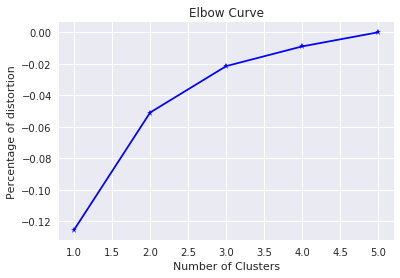

In [133]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

score

#pl.plot(Nc,score)

plt.plot(Nc,score,'b*-')

plt.xlabel('Number of Clusters')

plt.ylabel('Percentage of distortion')

plt.title('Elbow Curve')

plt.show()

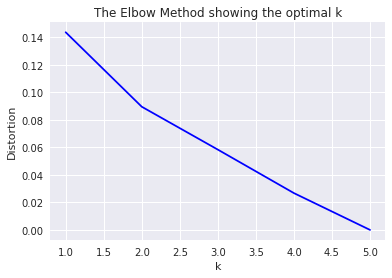

In [134]:
from scipy.spatial.distance import cdist, pdist

distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

As we can see from the elbow method the k value =2,3

## Clustering the Boroughs-Neighbhorhoods

In [135]:
print (SI_grouped.shape ,'\n' 
       ,manhattan_grouped.shape ,'\n'
       ,brook_grouped.shape,'\n',
       Q_grouped.shape,'\n',
       BR_grouped.shape)

(47, 152) 
 (37, 289) 
 (54, 261) 
 (54, 216) 
 (28, 135)


In [136]:
BR_grouped.shape

(28, 135)

In [137]:
print (manhattan_data.shape ,'\n' 
       ,Brooklyn_data.shape ,'\n'
       ,Queens_data.shape,'\n',
       SI_data.shape,'\n',
       BR_data.shape)

(38, 6) 
 (57, 6) 
 (57, 6) 
 (51, 6) 
 (29, 6)


In [138]:
print(neighborhoods_venues_sorted_SI.shape,'\n',
     neighborhoods_venues_sorted_BR.shape, '\n',
     neighborhoods_venues_sorted_brook.shape,'\n',
     neighborhoods_venues_sorted_Q.shape,'\n',neighborhoods_venues_sorted_man.shape)
     

(47, 11) 
 (28, 11) 
 (54, 11) 
 (54, 11) 
 (37, 11)


Creating Cluster lables for each Borough

#### 1. Borough -Manhattan

In [139]:
# set number of clusters
kclusters = 2

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [140]:
kclusters = 2
# run k-means clustering
kmeans_man = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped[manhattan_grouped.columns[1:284]])

# check cluster labels generated for each row in the dataframe
kmeans_man.labels_[0:10] 

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

#### 2.Brooklyn-Cluster lables

In [141]:
#brook_grouped.shape
kclusters = 2
# run k-means clustering
kmeans_brook = KMeans(n_clusters=kclusters, random_state=0).fit(brook_grouped[brook_grouped.columns[1:256]])

# check cluster labels generated for each row in the dataframe
kmeans_brook.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### 3.Queens - cluster lables

In [142]:
#Q_grouped.shape
kclusters = 2
# run k-means clustering
kmeans_Q = KMeans(n_clusters=kclusters, random_state=0).fit(Q_grouped[Q_grouped.columns[1:211]])

# check cluster labels generated for each row in the dataframe
kmeans_Q.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### 4.Bronx - Cluster Lables

In [143]:
#BR_grouped.shape

kclusters = 2
# run k-means clustering
kmeans_BR = KMeans(n_clusters=kclusters, random_state=0).fit(BR_grouped[BR_grouped.columns[1:138]])

# check cluster labels generated for each row in the dataframe
kmeans_BR.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### 5.Staten Island - Cluster Lables

In [144]:
kclusters = 2

# run k-means clustering
kmeans_SI = KMeans(n_clusters=kclusters, random_state=0).fit(SI_grouped[SI_grouped.columns[1:153]])

# check cluster labels generated for each row in the dataframe
kmeans_SI.labels_[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [145]:
print (manhattan_data.shape ,'\n' 
       ,Brooklyn_data.shape ,'\n'
       ,Queens_data.shape,'\n',
       SI_data.shape,'\n',
       BR_data.shape)

(38, 6) 
 (57, 6) 
 (57, 6) 
 (51, 6) 
 (29, 6)


Adding Cluters to the data

In [146]:
dfnew.shape

(232, 6)

In [147]:
## on Error run 
#neighborhoods_venues_sorted_man.drop(columns=['Cluster Labels'],inplace=True)
#neighborhoods_venues_sorted_brook.drop(columns=['Cluster Labels'],inplace=True)
#neighborhoods_venues_sorted_Q.drop(columns=['Cluster Labels'],inplace=True)
#neighborhoods_venues_sorted_BR.drop(columns=['Cluster Labels'],inplace=True)
#neighborhoods_venues_sorted_SI.drop(columns=['Cluster Labels'],inplace=True)

## Adding Cluster Lables --Manhattan
neighborhoods_venues_sorted_man.insert(0, 'Cluster Labels', kmeans_man.labels_)

## Adding Cluster Lables --Brooklyn
neighborhoods_venues_sorted_brook.insert(0, 'Cluster Labels', kmeans_brook.labels_)

## Adding Cluster Lables --Qunees
neighborhoods_venues_sorted_Q.insert(0, 'Cluster Labels', kmeans_Q.labels_)

## Adding Cluster Lables --Bronx
neighborhoods_venues_sorted_BR.insert(0, 'Cluster Labels', kmeans_BR.labels_)

## Adding Cluster Lables --Staten Island
neighborhoods_venues_sorted_SI.insert(0, 'Cluster Labels', kmeans_SI.labels_)

In [148]:
# merge to add latitude/longitude for each neighborhood

#1 Manhattan
Borough_merged1 = manhattan_data.join(neighborhoods_venues_sorted_man.set_index('Neighborhood'), on='NEIGHBORHOOD')

#2 Brooklyn
Borough_merged2 = Brooklyn_data.join(neighborhoods_venues_sorted_brook.set_index('Neighborhood'), on='NEIGHBORHOOD')

#3 Queens
Borough_merged3 = Queens_data.join(neighborhoods_venues_sorted_Q.set_index('Neighborhood'), on='NEIGHBORHOOD')

#4 Bronx
Borough_merged4 = BR_data.join(neighborhoods_venues_sorted_BR.set_index('Neighborhood'), on='NEIGHBORHOOD')

#5 Staten Island
Borough_merged5 = SI_data.join(neighborhoods_venues_sorted_SI.set_index('Neighborhood'), on='NEIGHBORHOOD')


#Borough_merged1.head() # check the last columns!
#Borough_merged.shape

#print(Borough_merged2.shape)
#Borough_merged2.dropna(subset=['Cluster Labels'], inplace=True)
#print(Borough_merged2.shape)

#print(Borough_merged3.shape)
#Borough_merged3.dropna(subset=['Cluster Labels'], inplace=True)
#print(Borough_merged3.shape)

#print(Borough_merged4.shape)
#Borough_merged4.dropna(subset=['Cluster Labels'], inplace=True)
#print(Borough_merged4.shape)

#print(Borough_merged5.shape)
#Borough_merged5.dropna(subset=['Cluster Labels'], inplace=True)
#print(Borough_merged5.shape

Checking for null values

In [149]:
New_Merge=pd.concat([Borough_merged1,Borough_merged2, Borough_merged3,Borough_merged4,Borough_merged5],ignore_index=True)

In [150]:
New_Merge.isna().sum()

BOROUGH                    0
NEIGHBORHOOD               0
Address                    0
coordinates                0
Latitude                   0
Longitude                  0
Cluster Labels            12
1st Most Common Venue     12
2nd Most Common Venue     12
3rd Most Common Venue     12
4th Most Common Venue     12
5th Most Common Venue     12
6th Most Common Venue     12
7th Most Common Venue     12
8th Most Common Venue     12
9th Most Common Venue     12
10th Most Common Venue    12
dtype: int64

New_Merge data set is Combined result of all Boroughs with Cluster Lablels

In [151]:
New_Merge.shape

(232, 17)

In [152]:
New_Merge.dropna(subset=['Cluster Labels'], inplace=True)

In [153]:
New_Merge['Cluster Labels']=New_Merge['Cluster Labels'].astype(int,inplace=True)

In [154]:
New_Merge.shape

(220, 17)

In [155]:
New_Merge.head()

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,ALPHABET CITY,"ALPHABET CITY,NY","(Alphabet City, Manhattan Community Board 3, M...",40.725,-73.980,1,Cocktail Bar,Bar,Coffee Shop,Wine Bar,Latin American Restaurant,Italian Restaurant,Garden,Pizza Place,Park,Nightclub
1,Manhattan,CHELSEA,"CHELSEA,NY","(Chelsea, Manhattan Community Board 4, Manhatt...",40.746,-74.002,1,Art Gallery,Italian Restaurant,Health & Beauty Service,Coffee Shop,Ice Cream Shop,Theater,French Restaurant,Café,Pool,Tapas Restaurant
2,Manhattan,CHINATOWN,"CHINATOWN,NY","(Chinatown, Manhattan Community Board 3, Manha...",40.716,-73.996,1,Chinese Restaurant,Bakery,Italian Restaurant,Salon / Barbershop,Vietnamese Restaurant,Malay Restaurant,Sandwich Place,Ice Cream Shop,Cocktail Bar,Spa
3,Manhattan,CIVIC CENTER,"CIVIC CENTER,NY","(Civic Center, Manhattan Community Board 1, Ma...",40.714,-74.002,1,Chinese Restaurant,Sandwich Place,Coffee Shop,Vietnamese Restaurant,Dim Sum Restaurant,Park,Optical Shop,Bakery,Dessert Shop,Salon / Barbershop
5,Manhattan,EAST VILLAGE,"EAST VILLAGE,NY","(East Village, Manhattan Community Board 3, Ma...",40.729,-73.987,1,Japanese Restaurant,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Bar,Sushi Restaurant,Seafood Restaurant,Tea Room,Café,Korean Restaurant


In [156]:
New_Merge['BOROUGH'].value_counts()

Brooklyn         54
Queens           54
Staten Island    47
Manhattan        37
Bronx            28
Name: BOROUGH, dtype: int64

Avgerage Sale Price of top 20 Neighbhorhoods

In [157]:
# BUILDING CLASS CATEGORY
print(df_data['NEIGHBORHOOD'].nunique())

pivot8=df_data.pivot_table(index='NEIGHBORHOOD', values='SALEPRICE', aggfunc=np.median)

pd.options.display.float_format = '{:.3f}'.format # Converting exponential numbers(378.3458+e) (applicable only to floats)
pivot8.rename(columns={'SALEPRICE':'AVG_SALEPRICE'}, inplace=True)
pivot8.sort_values(by='AVG_SALEPRICE',ascending=False)

249


,AVG_SALEPRICE
NEIGHBORHOOD,
MORNINGSIDE HEIGHTS,46500000.000
JAVITS CENTER,13497500.000
CO-OP CITY,7764000.000
DONGAN HILLS-OLD TOWN,7200000.000
HARLEM-WEST,7000000.000
SOHO,5350000.000
GREENWICH VILLAGE-WEST,4717217.500
CIVIC CENTER,3934000.000
LITTLE ITALY,3925000.000


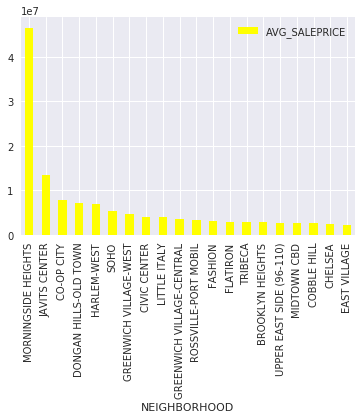

In [158]:
pivot8.sort_values(by='AVG_SALEPRICE',ascending=False).head(20).plot(kind='bar', color='yellow')

#pivot8.plot(kind='bar', color='yellow')

In [159]:
df_data.loc[df_data.groupby('BOROUGH')['SALEPRICE'].nlargest(1).index.get_level_values(1)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALEDATE,YEARSOLD,MONTHOFSALE
23192,Bronx,WESTCHESTER,30 WAREHOUSES,4,4226,5,,E1,1502 BASSETT AVENUE,,...,1,524200,285630,1951,4,E1,115000000,2018-12-21,2018,12
44267,Brooklyn,SPRING CREEK,08 RENTALS - ELEVATOR APARTMENTS,2,4435,1,,D3,1155 PENNSYLVANIA AVENUE,780,...,1092,358496,997720,1971,2,D3,869612895,2018-05-04,2018,5
761,Manhattan,CHELSEA,21 OFFICE BUILDINGS,4,713,1,,O6,75 9 AVENUE,,...,167,165200,1100533,1905,4,O6,2397501899,2018-03-20,2018,3
64797,Queens,REGO PARK,08 RENTALS - ELEVATOR APARTMENTS,2,3175,1,,D3,104-20 QUEENS BOULEVARD,,...,1348,259946,1741458,1960,2,D3,475000000,2018-11-08,2018,11
77498,Staten Island,ROSEBANK,21 OFFICE BUILDINGS,4,2820,95,,O3,1 EDGEWATER STREET,,...,43,795385,255880,1929,4,O3,47250000,2018-03-29,2018,3


In [160]:
SI_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
SUNNYSIDE,38,38,38,38,38,38
ELTINGVILLE,33,33,33,33,33,33
NEW SPRINGVILLE,32,32,32,32,32,32
STAPLETON-CLIFTON,31,31,31,31,31,31
STAPLETON,31,31,31,31,31,31
ROSEBANK,27,27,27,27,27,27
SOUTH BEACH,27,27,27,27,27,27
CASTLETON CORNERS,25,25,25,25,25,25
OAKWOOD,25,25,25,25,25,25


### Exploring the Clusters

#### Cluster 0

In [161]:
New_Merge.loc[New_Merge['Cluster Labels'] == 0, New_Merge.columns[[1] + list(range(5, New_Merge.shape[1]))]]

,NEIGHBORHOOD,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,FASHION,19.132,0,Shopping Mall,Motel,Train Station,Market,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,English Restaurant
38,BATH BEACH,-74.001,0,Pizza Place,Cantonese Restaurant,Gift Shop,Bank,Supplement Shop,Japanese Restaurant,Italian Restaurant,Shanghai Restaurant,Dessert Shop,Spa
39,BAY RIDGE,-74.027,0,Bar,Bakery,Spa,Bagel Shop,Pizza Place,Coffee Shop,Mexican Restaurant,Hookah Bar,American Restaurant,Italian Restaurant
40,BEDFORD STUYVESANT,-73.941,0,Pizza Place,Café,Coffee Shop,Bar,Fried Chicken Joint,Sandwich Place,Wine Shop,Deli / Bodega,Boutique,Nightclub
41,BENSONHURST,-73.993,0,Chinese Restaurant,Pizza Place,Bank,Bakery,Mobile Phone Shop,Japanese Restaurant,Cantonese Restaurant,Gourmet Shop,Asian Restaurant,Supplement Shop
42,BERGEN BEACH,-73.907,0,Deli / Bodega,Peruvian Restaurant,Plaza,Pizza Place,Italian Restaurant,Supermarket,Sushi Restaurant,Donut Shop,Fast Food Restaurant,Filipino Restaurant
43,BOERUM HILL,-73.984,0,Spa,Coffee Shop,Sandwich Place,French Restaurant,Bar,Yoga Studio,Furniture / Home Store,Martial Arts Dojo,Boutique,Grocery Store
44,BOROUGH PARK,-73.997,0,Pizza Place,Deli / Bodega,Restaurant,Café,Bank,Bakery,Pharmacy,Coffee Shop,Sandwich Place,Fast Food Restaurant
45,BRIGHTON BEACH,-73.961,0,Mobile Phone Shop,Fast Food Restaurant,Coffee Shop,Eastern European Restaurant,Bakery,Supermarket,Grocery Store,Theater,Spa,Café
46,BROOKLYN HEIGHTS,-73.995,0,Deli / Bodega,Park,Yoga Studio,Wine Shop,Italian Restaurant,Ice Cream Shop,Gym,Coffee Shop,Scenic Lookout,Plaza


#### Cluster 1

In [162]:
New_Merge.loc[New_Merge['Cluster Labels'] == 1, New_Merge.columns[[1] + list(range(5, New_Merge.shape[1]))]]

,NEIGHBORHOOD,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALPHABET CITY,-73.980,1,Cocktail Bar,Bar,Coffee Shop,Wine Bar,Latin American Restaurant,Italian Restaurant,Garden,Pizza Place,Park,Nightclub
1,CHELSEA,-74.002,1,Art Gallery,Italian Restaurant,Health & Beauty Service,Coffee Shop,Ice Cream Shop,Theater,French Restaurant,Café,Pool,Tapas Restaurant
2,CHINATOWN,-73.996,1,Chinese Restaurant,Bakery,Italian Restaurant,Salon / Barbershop,Vietnamese Restaurant,Malay Restaurant,Sandwich Place,Ice Cream Shop,Cocktail Bar,Spa
3,CIVIC CENTER,-74.002,1,Chinese Restaurant,Sandwich Place,Coffee Shop,Vietnamese Restaurant,Dim Sum Restaurant,Park,Optical Shop,Bakery,Dessert Shop,Salon / Barbershop
5,EAST VILLAGE,-73.987,1,Japanese Restaurant,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Bar,Sushi Restaurant,Seafood Restaurant,Tea Room,Café,Korean Restaurant
7,FINANCIAL,-74.009,1,Coffee Shop,Hotel,Steakhouse,American Restaurant,Pizza Place,Juice Bar,Wine Shop,Sandwich Place,Italian Restaurant,Gym
8,FLATIRON,-73.990,1,Gym,Gym / Fitness Center,American Restaurant,Italian Restaurant,Japanese Restaurant,Wine Shop,Mexican Restaurant,Mediterranean Restaurant,Cycle Studio,Vegetarian / Vegan Restaurant
9,GRAMERCY,-73.984,1,Spa,Wine Shop,American Restaurant,Italian Restaurant,Pizza Place,Bar,Coffee Shop,Bagel Shop,Hotel,Indie Theater
10,GREENWICH VILLAGE-CENTRAL,-73.997,1,Italian Restaurant,Coffee Shop,American Restaurant,Cosmetics Shop,Vegetarian / Vegan Restaurant,Yoga Studio,Wine Bar,Sandwich Place,Steakhouse,Massage Studio
11,GREENWICH VILLAGE-WEST,-73.997,1,Italian Restaurant,Coffee Shop,American Restaurant,Cosmetics Shop,Vegetarian / Vegan Restaurant,Yoga Studio,Wine Bar,Sandwich Place,Steakhouse,Massage Studio


MAP With Cluster Lables

In [163]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Merge['Latitude'], New_Merge['Longitude'], New_Merge['NEIGHBORHOOD'], New_Merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Top Two Neighbhorhoods from Each Borough with Max SALEPRICE

In [164]:
df_data.groupby(['BOROUGH']).apply(lambda x: x.nlargest(2, "SALEPRICE")).sort_values(by='SALEPRICE',ascending=False)

BOROUGH             NEIGHBORHOOD  \
BOROUGH                                                       
Manhattan     761        Manhattan                  CHELSEA   
              14620      Manhattan  UPPER WEST SIDE (59-79)   
Brooklyn      44267       Brooklyn             SPRING CREEK   
Queens        64797         Queens                REGO PARK   
Brooklyn      43309       Brooklyn                 RED HOOK   
Queens        61620         Queens         LONG ISLAND CITY   
Bronx         23192          Bronx              WESTCHESTER   
Staten Island 77498  Staten Island                 ROSEBANK   
              77718  Staten Island     ROSSVILLE-CHARLESTON   
Bronx         20766          Bronx           PELHAM GARDENS   

                                         BUILDING CLASS CATEGORY  \
BOROUGH                                                            
Manhattan     761    21 OFFICE BUILDINGS                           
              14620  34 THEATRES                                   
Brooklyn      44267  08 RENTALS - ELEVATOR APARTMENTS              
Queens        64797  08 RENTALS - ELEVATOR APARTMENTS              
Brooklyn      43309  29 COMMERCIAL GARAGES                         
Queens        61620  08 RENTALS - ELEVATOR APARTMENTS              
Bronx         23192  30 WAREHOUSES                                 
Staten Island 77498  21 OFFICE BUILDINGS                           
              77718  22 STORE BUILDINGS                            
Bronx         20766  22 STORE BUILDINGS                            

                    TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT  \
BOROUGH                                                          
Manhattan     761                      4    713    1             
              14620                    4   1119   61             
Brooklyn      44267                    2   4435    1             
Queens        64797                    2   3175    1             
Brooklyn      43309                    4    514    1             
Queens        61620                    2    425    1             
Bronx         23192                    4   4226    5             
Staten Island 77498                    4   2820   95             
              77718                    4   7511    1             
Bronx         20766                    4   4504  412             

                    BUILDING CLASS AT PRESENT                   ADDRESS  \
BOROUGH                                                                   
Manhattan     761                          O6               75 9 AVENUE   
              14620                        J6       149 COLUMBUS AVENUE   
Brooklyn      44267                        D3  1155 PENNSYLVANIA AVENUE   
Queens        64797                        D3   104-20 QUEENS BOULEVARD   
Brooklyn      43309                        G7          44 FERRIS STREET   
Queens        61620                        D6           23-01 42ND ROAD   
Bronx         23192                        E1       1502 BASSETT AVENUE   
Staten Island 77498                        O3        1 EDGEWATER STREET   
              77718                        K6   2935 VETERANS ROAD WEST   
Bronx         20766                        K8   1806 EAST GUN HILL ROAD   

                    APARTMENT NUMBER     ...       TOTAL UNITS  \
BOROUGH                                  ...                     
Manhattan     761                        ...               167   
              14620                      ...                 1   
Brooklyn      44267              780     ...              1092   
Queens        64797                      ...              1348   
Brooklyn      43309                      ...                 1   
Queens        61620                      ...               392   
Bronx         23192                      ...                 1   
Staten Island 77498                      ...                43   
              77718                      ...                28   
Bronx         20766              

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Top 2 Neighbhorhoods with MAX SalePrice across Each Borough')

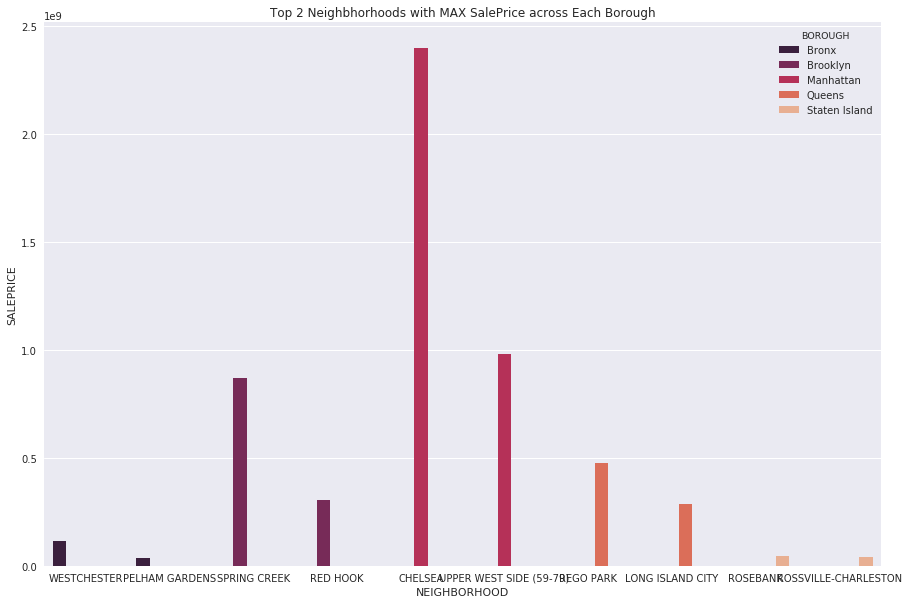

In [165]:
plt.figure(figsize=(15,10))
sns.barplot(x='NEIGHBORHOOD', y='SALEPRICE', hue='BOROUGH', data=df_data.groupby(['BOROUGH']).apply(lambda x: x.nlargest(2, "SALEPRICE")), palette='rocket',ci=None)
plt.title('Top 2 Neighbhorhoods with MAX SalePrice across Each Borough')

#### Two Neighborhoods With Min SalePrice across each Borough

In [166]:
#df_data.groupby(['BOROUGH']).apply(lambda x: x.nlsmallest(2, "SALEPRICE")).sort_values(by='SALEPRICE',ascending=False)

In [167]:
New_Merge[New_Merge['NEIGHBORHOOD'].isin(['PELHAM GARDENS','SPRING CREEK' ,'CHELSEA' ,'REGO PARK','ROSEBANK'])]

,BOROUGH,NEIGHBORHOOD,Address,coordinates,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Manhattan,CHELSEA,"CHELSEA,NY","(Chelsea, Manhattan Community Board 4, Manhatt...",40.746,-74.002,1,Art Gallery,Italian Restaurant,Health & Beauty Service,Coffee Shop,Ice Cream Shop,Theater,French Restaurant,Café,Pool,Tapas Restaurant
87,Brooklyn,SPRING CREEK,"SPRING CREEK,NY","(Spring Creek, BK, Kings County, NYC, New York...",40.657,-73.862,0,Moving Target,Bus Station,Construction & Landscaping,Women's Store,Food,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish Market,Flower Shop
139,Queens,REGO PARK,"REGO PARK,NY","(Rego Park, Queens, Queens County, NYC, New Yo...",40.723,-73.862,0,Yoga Studio,Gourmet Shop,Hot Dog Joint,Pub,Convenience Store,Donut Shop,Seafood Restaurant,Eastern European Restaurant,Chinese Restaurant,Bus Station
171,Bronx,PELHAM GARDENS,"PELHAM GARDENS,NY","(Pelham, Town of Pelham, Westchester County, N...",40.910,-73.808,0,Cosmetics Shop,American Restaurant,Ice Cream Shop,Wine Shop,Italian Restaurant,Sushi Restaurant,Grocery Store,Movie Theater,New American Restaurant,Flower Shop
215,Staten Island,ROSEBANK,"ROSEBANK,NY","(Rosebank, Todt Hill, Staten Island, Richmond ...",40.614,-74.066,0,Italian Restaurant,Pizza Place,Beach,Mexican Restaurant,Restaurant,Cajun / Creole Restaurant,Bus Stop,Filipino Restaurant,Breakfast Spot,Gastropub


In [168]:
manhattan_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALPHABET CITY,100,100,100,100,100,100
CHELSEA,100,100,100,100,100,100
UPPER WEST SIDE (96-116),100,100,100,100,100,100
UPPER WEST SIDE (79-96),100,100,100,100,100,100
UPPER WEST SIDE (59-79),100,100,100,100,100,100


In [169]:
Queen_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).reset_index().head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,LONG ISLAND CITY,78,78,78,78,78,78
1,ELMHURST,70,70,70,70,70,70
2,KEW GARDENS,51,51,51,51,51,51
3,CORONA,47,47,47,47,47,47
4,GLENDALE,42,42,42,42,42,42


#### Venues in Each Borough

In [170]:
New_Merge['1st Most Common Venue'].count()

220

In [171]:
New_Merge.groupby('Cluster Labels').count()[['1st Most Common Venue']]

,1st Most Common Venue
Cluster Labels,
0,176
1,44


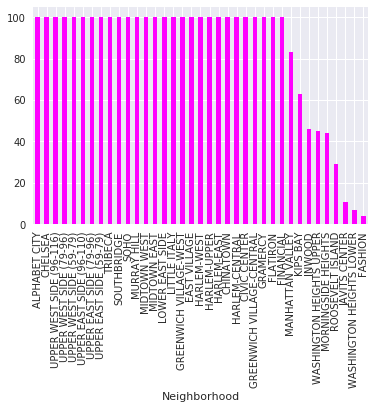

In [172]:
manhattan_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).iloc[0:,3].plot(kind='bar',color='#FF00FF')

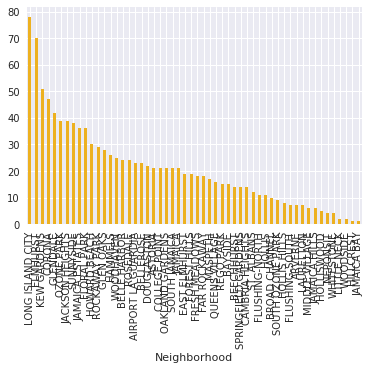

In [173]:
Queen_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).iloc[0:,3].plot(kind='bar',color= '#EDB120')

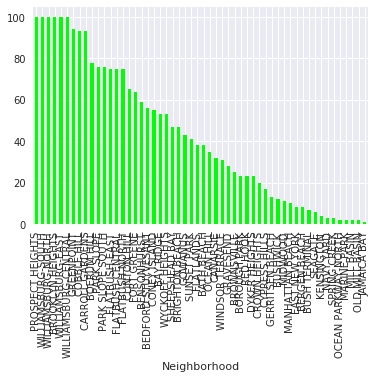

In [174]:
Brooklyn_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).iloc[0:,3].plot(kind='bar',color= '#00FF00')

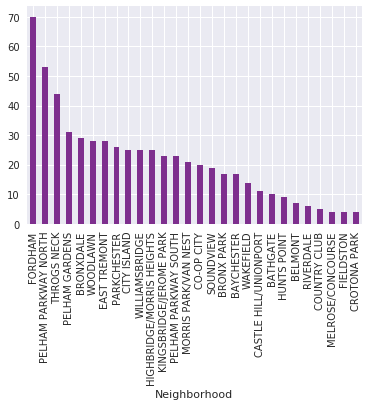

In [175]:
BR_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).iloc[0:,3].plot(kind='bar',color= '#7E2F8E')

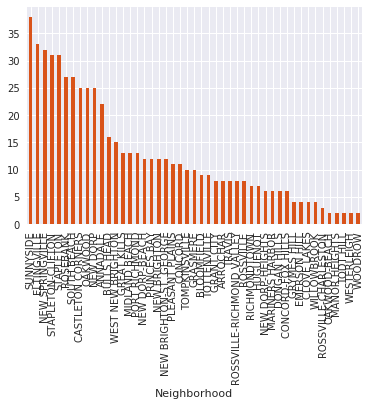

In [176]:
SI_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).iloc[0:,3].plot(kind='bar',color= '#D95319')